<a href="https://colab.research.google.com/github/skdevS18/Images_classification/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages(c("dplyr", "tidyr", "DescTools", "nnet", "car"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘proxy’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
library(dplyr)
library(tidyr)
library(DescTools)
library(nnet)    # multinom()
library(car)     # vif()
library(dplyr)   # data manipulation

In [ ]:
df <- read.csv("WomenNutrition.csv")

## **Table 1. Background Characteristics of the Study Participants by Area of Residence**

In [ ]:
generate_table1 <- function(df, group_var = "area") {
  library(dplyr)

  # Variables to include in Table 1
  vars_to_tabulate <- c("age_cat", "religion", "edu", "occup", "marriage_age", "parity",
                        "births_last5", "breastfeeding", "contraceptive", "autonomy", "media",
                        "husb_edu", "hh_size", "wealth", "division")

  # Get overall total
  total_all <- nrow(df)

  table1 <- data.frame()

  for (var in vars_to_tabulate) {
    levels <- levels(as.factor(df[[var]]))  # or predefined order if you have

    for (lvl in levels) {
      row <- data.frame(
        Variable = var,
        Category = lvl,
        stringsAsFactors = FALSE
      )

      for (grp in c("Urban", "Rural")) {
        sub <- df %>% filter(!!sym(group_var) == grp)
        total_grp <- nrow(sub)
        count_grp <- sum(sub[[var]] == lvl, na.rm = TRUE)
        percent_grp <- round((count_grp / total_grp) * 100, 1)
        colname <- paste0(grp, " (n=", total_grp, ")")
        row[[colname]] <- paste0(count_grp, " (", percent_grp, "%)")
      }

      # Overall
      count_all <- sum(df[[var]] == lvl, na.rm = TRUE)
      percent_all <- round((count_all / total_all) * 100, 1)
      row[[paste0("Overall (n=", total_all, ")")]] <- paste0(count_all, " (", percent_all, "%)")

      table1 <- bind_rows(table1, row)
    }
  }

  return(table1)
}


In [ ]:
table1_output <- generate_table1(df)
table1_output


Variable      Category           Urban (n=2987) Rural (n=5582)
1  age_cat       15–19              108 (3.6%)     239 (4.3%)    
2  age_cat       20–29              879 (29.4%)    1810 (32.4%)  
3  age_cat       30–39              1150 (38.5%)   2027 (36.3%)  
4  age_cat       40–49              850 (28.5%)    1506 (27%)    
5  religion      Muslim             2617 (87.6%)   5054 (90.5%)  
6  religion      Non-Muslim         370 (12.4%)    528 (9.5%)    
7  edu           Higher             641 (21.5%)    508 (9.1%)    
8  edu           No education       374 (12.5%)    895 (16%)     
9  edu           Primary            698 (23.4%)    1672 (30%)    
10 edu           Secondary          1274 (42.7%)   2507 (44.9%)  
11 occup         Agricultural       255 (8.5%)     1643 (29.4%)  
12 occup         Non-agricultural   754 (25.2%)    679 (12.2%)   
13 occup         Not working        1978 (66.2%)   3260 (58.4%)  
14 marriage_age  <20 years          2363 (79.1%)   4914 (88%)    
15 marriage_age  ≥20 years          624 (20.9%)    668 (12%)     
16 parity        1–2 children       1769 (59.2%)   3134 (56.1%)  
17 parity        3 or more children 1215 (40.7%)   2426 (43.5%)  
18 parity        No children        3 (0.1%)       22 (0.4%)     
19 births_last5  No                 1769 (59.2%)   3134 (56.1%)  
20 births_last5  Yes                1218 (40.8%)   2448 (43.9%)  
21 breastfeeding No                 2341 (78.4%)   4216 (75.5%)  
22 breastfeeding Yes                646 (21.6%)    1366 (24.5%)  
23 contraceptive Not using          1278 (42.8%)   2102 (37.7%)  
24 contraceptive Others             812 (27.2%)    1618 (29%)    
25 contraceptive Pills              897 (30%)      1862 (33.4%)  
26 autonomy      Experienced        1846 (61.8%)   3337 (59.8%)  
27 autonomy      Not experienced    1141 (38.2%)   2245 (40.2%)  
28 media         Not at all         2167 (72.5%)   2787 (49.9%)  
29 media         Yes                820 (27.5%)    2795 (50.1%)  
30 husb_edu      Higher             783 (26.2%)    643 (11.5%)   
31 husb_edu      No education       520 (17.4%)    1459 (26.1%)  
32 husb_edu      Primary            728 (24.4%)    1741 (31.2%)  
33 husb_edu      Secondary          956 (32%)      1739 (31.2%)  
34 hh_size       <5 members         1495 (50.1%)   2521 (45.2%)  
35 hh_size       ≥5 members         1492 (49.9%)   3061 (54.8%)  
36 wealth        Middle             542 (18.1%)    1199 (21.5%)  
37 wealth        Poorer             305 (10.2%)    1337 (24%)    
38 wealth        Poorest            173 (5.8%)     1413 (25.3%)  
39 wealth        Richer             751 (25.1%)    1011 (18.1%)  
40 wealth        Richest            1216 (40.7%)   622 (11.1%)   
41 division      Barisal            306 (10.2%)    615 (11%)     
42 division      Chittagong         536 (17.9%)    735 (13.2%)   
43 division      Dhaka              616 (20.6%)    655 (11.7%)   
44 division      Khulna             346 (11.6%)    757 (13.6%)   
45 division      Mymensingh         301 (10.1%)    613 (11%)     
46 division      Rajshahi           209 (7%)       720 (12.9%)   
47 division      Rangpur            387 (13%)      719 (12.9%)   
48 division      Sylhet             286 (9.6%)     768 (13.8%)   
   Overall (n=8569)
1  347 (4%)        
2  2689 (31.4%)    
3  3177 (37.1%)    
4  2356 (27.5%)    
5  7671 (89.5%)    
6  898 (10.5%)     
7  1149 (13.4%)    
8  1269 (14.8%)    
9  2370 (27.7%)    
10 3781 (44.1%)    
11 1898 (22.1%)    
12 1433 (16.7%)    
13 5238 (61.1%)    
14 7277 (84.9%)    
15 1292 (15.1%)    
16 4903 (57.2%)    
17 3641 (42.5%)    
18 25 (0.3%)       
19 4903 (57.2%)    
20 3666 (42.8%)    
21 6557 (76.5%)    
22 2012 (23.5%)    
23 3380 (39.4%)    
24 2430 (28.4%)    
25 2759 (32.2%)    
26 5183 (60.5%)    
27 3386 (39.5%)    
28 4954 (57.8%)    
29 3615 (42.2%)    
30 1426 (16.6%)    
31 1979 (23.1%)    
32 2469 (28.8%)    
33 2695 (31.5%)    
34 4016 (46.9%)    
35 4553 (53.1%)    
36 1741 (20.3%)    
37 1642 (19.2%)    
38 1586 (

ERROR: Error: object 'df.ncols' not found


In [ ]:

# Helper function to add significance stars based on p-value
significance_star <- function(p) {
  if (is.na(p)) return("")
  else if (p < 0.001) return("***")
  else if (p < 0.01) return("**")
  else if (p < 0.05) return("*")
  else return("")
}

get_bmi_table_with_chisq <- function(df, group_var, bmi_cats = c("Underweight", "Overweight", "Obese", "Normal")) {
  df$bmi <- factor(df$bmi, levels = c("Normal", "Underweight", "Overweight", "Obese"))

  df_urban <- df %>% filter(area == "Urban")
  df_rural <- df %>% filter(area == "Rural")

  # Internal function for one BMI category
  calc_percent_with_chisq <- function(bmi_cat) {
    # Urban
    urban <- df_urban %>%
      group_by(across(all_of(group_var))) %>%
      summarise(n_urban = n(),
                count_urban = sum(bmi == bmi_cat), .groups = "drop")

    # Rural
    rural <- df_rural %>%
      group_by(across(all_of(group_var))) %>%
      summarise(n_rural = n(),
                count_rural = sum(bmi == bmi_cat), .groups = "drop")

    # Merge and compute % and chi-square
    merged <- full_join(urban, rural, by = group_var) %>%
      rowwise() %>%
      mutate(
        # Handle missing
        n_urban = ifelse(is.na(n_urban), 0, n_urban),
        count_urban = ifelse(is.na(count_urban), 0, count_urban),
        n_rural = ifelse(is.na(n_rural), 0, n_rural),
        count_rural = ifelse(is.na(count_rural), 0, count_rural),

        # Percentages
        urban_percent = round(count_urban / n_urban * 100, 1),
        rural_percent = round(count_rural / n_rural * 100, 1),
        overall_total = n_urban + n_rural,
        overall_count = count_urban + count_rural,
        overall_percent = round(overall_count / overall_total * 100, 1),

        # Chi-square
        p_value = tryCatch({
          suppressWarnings(prop.test(c(count_urban, count_rural), c(n_urban, n_rural))$p.value)
        }, error = function(e) NA),
        star = significance_star(p_value),

        # Output format
        Urban = paste0(urban_percent, star),
        Rural = paste0(rural_percent, star),
        Overall = paste0(overall_percent),

        BMI = bmi_cat
      ) %>%
      ungroup() %>%
      select(all_of(group_var), BMI, Urban, Rural, Overall)

    return(merged)
  }

  # Loop over BMI categories
  table_list <- lapply(bmi_cats, calc_percent_with_chisq)

  # Combine and reshape
  table_full <- bind_rows(table_list) %>%
    pivot_wider(names_from = BMI, values_from = c(Urban, Rural, Overall))

  return(table_full)
}


In [ ]:
get_bmi_table_with_chisq(df, group_var = "area")




area  Urban_Underweight Urban_Overweight Urban_Obese Urban_Normal
1 Urban 6.4               39               26.3        28.3        
2 Rural NaN               NaN              NaN         NaN         
  Rural_Underweight Rural_Overweight Rural_Obese Rural_Normal
1 NaN               NaN              NaN         NaN         
2 11.4              36.2             15.8        36.6        
  Overall_Underweight Overall_Overweight Overall_Obese Overall_Normal
1 6.4                 39                 26.3          28.3          
2 11.4                36.2               15.8          36.6

In [ ]:
get_bmi_table_with_chisq(df, group_var = "religion")

religion   Urban_Underweight Urban_Overweight Urban_Obese Urban_Normal
1 Muslim     6.5***            38.9**           26.3***     28.3***     
2 Non-Muslim 5.9**             39.2             26.5***     28.4**      
  Rural_Underweight Rural_Overweight Rural_Obese Rural_Normal
1 11.4***           35.8**           16.2***     36.6***     
2 11.4**            40.3             11.4***     36.9**      
  Overall_Underweight Overall_Overweight Overall_Obese Overall_Normal
1 9.8                 36.8               19.7          33.7          
2 9.1                 39.9               17.6          33.4

## **Table 2. Prevalence of Malnutrition (Underweight, Overweight, and Obesity) Among Women Aged 15–49 Years Across Background Characteristics, by Area of Residence**

In [ ]:


# Significance stars helper
significance_star <- function(p) {
  if (is.na(p)) return("")
  else if (p < 0.001) return("***")
  else if (p < 0.01) return("**")
  else if (p < 0.05) return("*")
  else return("")
}

# Main function: produce Table 2 style prevalence with CIs and stars
get_bmi_prevalence_table <- function(df, group_var, bmi_cats = c("Underweight", "Overweight", "Obese")) {
  # Ensure bmi factor
  df$bmi <- factor(df$bmi, levels = c("Normal", "Underweight", "Overweight", "Obese"))

  # Split urban and rural subsets
  df_urban <- df %>% filter(area == "Urban")
  df_rural <- df %>% filter(area == "Rural")

  # Internal function to calculate prevalence + CI + stars for one BMI category
  calc_prevalence <- function(bmi_cat) {
    # Summarize urban and rural
    urban <- df_urban %>%
      group_by(across(all_of(group_var))) %>%
      summarise(n_urban = n(),
                count_urban = sum(bmi == bmi_cat), .groups = "drop")

    rural <- df_rural %>%
      group_by(across(all_of(group_var))) %>%
      summarise(n_rural = n(),
                count_rural = sum(bmi == bmi_cat), .groups = "drop")

    # Merge and compute CIs, p-values, stars
    merged <- full_join(urban, rural, by = group_var) %>%
      rowwise() %>%
      mutate(
        n_urban = ifelse(is.na(n_urban), 0, n_urban),
        count_urban = ifelse(is.na(count_urban), 0, count_urban),
        n_rural = ifelse(is.na(n_rural), 0, n_rural),
        count_rural = ifelse(is.na(count_rural), 0, count_rural),
        total = n_urban + n_rural,
        count_total = count_urban + count_rural,

        urban_ci_lwr = BinomCI(count_urban, n_urban, method = "wilson")[, 2],
        urban_ci_upr = BinomCI(count_urban, n_urban, method = "wilson")[, 3],
        urban_percent = round(count_urban / n_urban * 100, 1),
        urban_lower = round(urban_ci_lwr * 100, 1),
        urban_upper = round(urban_ci_upr * 100, 1),

        rural_ci_lwr = BinomCI(count_rural, n_rural, method = "wilson")[, 2],
        rural_ci_upr = BinomCI(count_rural, n_rural, method = "wilson")[, 3],
        rural_percent = round(count_rural / n_rural * 100, 1),
        rural_lower = round(rural_ci_lwr * 100, 1),
        rural_upper = round(rural_ci_upr * 100, 1),

        overall_ci_lwr = BinomCI(count_total, total, method = "wilson")[, 2],
        overall_ci_upr = BinomCI(count_total, total, method = "wilson")[, 3],
        overall_percent = round(count_total / total * 100, 1),
        overall_lower = round(overall_ci_lwr * 100, 1),
        overall_upper = round(overall_ci_upr * 100, 1),

        p_value = tryCatch({
          suppressWarnings(prop.test(c(count_urban, count_rural),
                                     c(n_urban, n_rural))$p.value)
        }, error = function(e) NA),

        stars = significance_star(p_value),

        Urban = paste0(urban_percent, " [", urban_lower, ", ", urban_upper, "]", stars),
        Rural = paste0(rural_percent, " [", rural_lower, ", ", rural_upper, "]", stars),
        Overall = paste0(overall_percent, " [", overall_lower, ", ", overall_upper, "]"),
        BMI = bmi_cat
      ) %>%
      ungroup() %>%
      select(all_of(group_var), BMI, Urban, Rural, Overall)

    return(merged)
  }

  # Loop over BMI categories and combine results
  table_list <- lapply(bmi_cats, calc_prevalence)

  table_full <- bind_rows(table_list) %>%
    pivot_wider(names_from = BMI, values_from = c(Urban, Rural, Overall))

  return(table_full)
}


In [ ]:
result_table <- get_bmi_prevalence_table(df, "bmi")

# View
result_table

bmi         Urban_Underweight Urban_Overweight Urban_Obese    
1 Normal      0 [0, 0.5]        0 [0, 0.5]       0 [0, 0.5]     
2 Underweight 100 [98, 100]     0 [0, 2]         0 [0, 2]       
3 Overweight  0 [0, 0.3]        100 [99.7, 100]  0 [0, 0.3]     
4 Obese       0 [0, 0.5]        0 [0, 0.5]       100 [99.5, 100]
  Rural_Underweight Rural_Overweight Rural_Obese     Overall_Underweight
1 0 [0, 0.2]        0 [0, 0.2]       0 [0, 0.2]      0 [0, 0.1]         
2 100 [99.4, 100]   0 [0, 0.6]       0 [0, 0.6]      100 [99.5, 100]    
3 0 [0, 0.2]        100 [99.8, 100]  0 [0, 0.2]      0 [0, 0.1]         
4 0 [0, 0.4]        0 [0, 0.4]       100 [99.6, 100] 0 [0, 0.2]         
  Overall_Overweight Overall_Obese  
1 0 [0, 0.1]         0 [0, 0.1]     
2 0 [0, 0.5]         0 [0, 0.5]     
3 100 [99.9, 100]    0 [0, 0.1]     
4 0 [0, 0.2]         100 [99.8, 100]

In [ ]:
result_table <- get_bmi_prevalence_table(df, "area")

# View
result_table

area  Urban_Underweight Urban_Overweight Urban_Obese       Rural_Underweight
1 Urban 6.4 [5.6, 7.4]    39 [37.2, 40.7]  26.3 [24.8, 27.9] NaN [NaN, NaN]   
2 Rural NaN [NaN, NaN]    NaN [NaN, NaN]   NaN [NaN, NaN]    11.4 [10.6, 12.3]
  Rural_Overweight  Rural_Obese       Overall_Underweight Overall_Overweight
1 NaN [NaN, NaN]    NaN [NaN, NaN]    6.4 [5.6, 7.4]      39 [37.2, 40.7]   
2 36.2 [34.9, 37.5] 15.8 [14.9, 16.8] 11.4 [10.6, 12.3]   36.2 [34.9, 37.5] 
  Overall_Obese    
1 26.3 [24.8, 27.9]
2 15.8 [14.9, 16.8]

###### Age categories

In [ ]:

result_table <- get_bmi_prevalence_table(df, "age_cat")

# View
result_table


age_cat Urban_Underweight  Urban_Overweight    Urban_Obese         
1 15–19   19.4 [13.1, 27.9]  20.4 [13.9, 28.9]   7.4 [3.8, 13.9]     
2 20–29   8.8 [7.1, 10.8]*** 37.3 [34.2, 40.6]** 19.6 [17.1, 22.3]***
3 30–39   4.6 [3.5, 6]***    41 [38.1, 43.8]     28.4 [25.9, 31.1]***
4 40–49   4.8 [3.6, 6.5]***  40.4 [37.1, 43.7]   32.8 [29.8, 36.1]***
  Rural_Underweight    Rural_Overweight    Rural_Obese         
1 28.9 [23.5, 34.9]    18.8 [14.4, 24.3]   3.8 [2, 7]          
2 14.1 [12.6, 15.8]*** 31.8 [29.7, 33.9]** 12.4 [10.9, 14]***  
3 7.8 [6.8, 9.1]***    39.5 [37.4, 41.7]   18.8 [17.2, 20.6]***
4 10.3 [8.9, 11.9]***  39.8 [37.3, 42.3]   17.7 [15.9, 19.7]***
  Overall_Underweight Overall_Overweight Overall_Obese    
1 25.9 [21.6, 30.8]   19.3 [15.5, 23.8]  4.9 [3.1, 7.7]   
2 12.3 [11.2, 13.6]   33.6 [31.8, 35.4]  14.7 [13.4, 16.1]
3 6.7 [5.9, 7.6]      40 [38.3, 41.8]    22.3 [20.9, 23.8]
4 8.3 [7.3, 9.5]      40 [38, 42]        23.2 [21.5, 24.9]

###### Religion

In [ ]:

result_table <- get_bmi_prevalence_table(df, "religion")

# View
result_table

religion   Urban_Underweight Urban_Overweight    Urban_Obese         
1 Muslim     6.5 [5.6, 7.5]*** 38.9 [37.1, 40.8]** 26.3 [24.6, 28]***  
2 Non-Muslim 5.9 [4, 8.8]**    39.2 [34.4, 44.3]   26.5 [22.2, 31.2]***
  Rural_Underweight    Rural_Overweight    Rural_Obese         
1 11.4 [10.6, 12.3]*** 35.8 [34.4, 37.1]** 16.2 [15.3, 17.3]***
2 11.4 [8.9, 14.4]**   40.3 [36.2, 44.6]   11.4 [8.9, 14.4]*** 
  Overall_Underweight Overall_Overweight Overall_Obese    
1 9.8 [9.1, 10.4]     36.8 [35.8, 37.9]  19.7 [18.8, 20.6]
2 9.1 [7.4, 11.2]     39.9 [36.7, 43.1]  17.6 [15.2, 20.2]

###### Education

In [ ]:

result_table <- get_bmi_prevalence_table(df, "edu")

# View
result_table

edu          Urban_Underweight Urban_Overweight   Urban_Obese         
1 Higher       4.1 [2.8, 5.9]**  44.5 [40.7, 48.3]* 27.9 [24.6, 31.5]** 
2 No education 9.4 [6.8, 12.7]*  33.7 [29.1, 38.6]  22.2 [18.3, 26.7]***
3 Primary      6.6 [5, 8.7]***   34 [30.5, 37.5]    23.8 [20.8, 27.1]***
4 Secondary    6.7 [5.4, 8.2]*** 40.5 [37.8, 43.2]* 28.1 [25.7, 30.6]***
  Rural_Underweight    Rural_Overweight   Rural_Obese         
1 8.7 [6.5, 11.4]**    37.4 [33.3, 41.7]* 19.9 [16.6, 23.6]** 
2 14.6 [12.5, 17.1]*   37.2 [34.1, 40.4]  9.2 [7.4, 11.2]***  
3 12.4 [10.9, 14.1]*** 34.5 [32.3, 36.8]  16.1 [14.4, 17.9]***
4 10.2 [9, 11.4]***    36.7 [34.8, 38.6]* 17.1 [15.7, 18.6]***
  Overall_Underweight Overall_Overweight Overall_Obese    
1 6.1 [4.9, 7.6]      41.3 [38.5, 44.2]  24.4 [22, 26.9]  
2 13.1 [11.3, 15]     36.2 [33.6, 38.9]  13 [11.3, 15]    
3 10.7 [9.5, 12]      34.3 [32.5, 36.3]  18.4 [16.8, 20]  
4 9 [8.1, 9.9]        38 [36.4, 39.5]    20.8 [19.6, 22.1]

###### Occupation

In [ ]:

result_table <- get_bmi_prevalence_table(df, "occup")

# View
result_table

occup            Urban_Underweight Urban_Overweight    Urban_Obese         
1 Agricultural     8.6 [5.8, 12.7]   40.4 [34.6, 46.5]   19.6 [15.2, 24.9]** 
2 Non-agricultural 6.2 [4.7, 8.2]    40.2 [36.7, 43.7]   24.3 [21.3, 27.5]***
3 Not working      6.2 [5.2, 7.4]*** 38.3 [36.2, 40.5]** 28 [26, 30]***      
  Rural_Underweight    Rural_Overweight    Rural_Obese         
1 10.9 [9.5, 12.5]     37.6 [35.2, 39.9]   13.3 [11.8, 15.1]** 
2 8.8 [6.9, 11.2]      39.8 [36.2, 43.5]   16.6 [14, 19.6]***  
3 12.2 [11.2, 13.4]*** 34.8 [33.1, 36.4]** 16.8 [15.6, 18.2]***
  Overall_Underweight Overall_Overweight Overall_Obese    
1 10.6 [9.3, 12.1]    37.9 [35.8, 40.1]  14.2 [12.7, 15.8]
2 7.5 [6.2, 8.9]      40 [37.5, 42.5]    20.7 [18.6, 22.8]
3 10 [9.2, 10.8]      36.1 [34.8, 37.4]  21 [20, 22.2]

###### Mariage age

In [ ]:

result_table <- get_bmi_prevalence_table(df, "marriage_age")

# View
result_table

marriage_age Urban_Underweight Urban_Overweight  Urban_Obese         
1 <20 years    6.7 [5.8, 7.8]*** 38.2 [36.3, 40.2] 26.1 [24.3, 27.9]***
2 ≥20 years    5.3 [3.8, 7.3]**  41.8 [38, 45.7]   27.2 [23.9, 30.9]***
  Rural_Underweight    Rural_Overweight  Rural_Obese         
1 11.6 [10.8, 12.5]*** 36.1 [34.8, 37.5] 15.7 [14.7, 16.8]***
2 10 [8, 12.5]**       36.5 [33, 40.2]   16.3 [13.7, 19.3]***
  Overall_Underweight Overall_Overweight Overall_Obese    
1 10 [9.4, 10.7]      36.8 [35.7, 37.9]  19.1 [18.2, 20]  
2 7.7 [6.4, 9.3]      39.1 [36.5, 41.8]  21.6 [19.4, 23.9]

###### Parity

In [ ]:

result_table <- get_bmi_prevalence_table(df, "parity")

# View
result_table

parity             Urban_Underweight Urban_Overweight   Urban_Obese         
1 1–2 children       4.7 [3.8, 5.8]*** 40.1 [37.9, 42.4]  30.7 [28.6, 32.9]***
2 3 or more children 9 [7.5, 10.7]***  37.2 [34.5, 40]*** 20 [17.8, 22.3]***  
3 No children        0 [0, 56.1]       66.7 [20.8, 93.9]  0 [0, 56.1]         
  Rural_Underweight    Rural_Overweight     Rural_Obese         
1 8.5 [7.6, 9.5]***    39.8 [38.1, 41.5]    18.5 [17.2, 19.9]***
2 15.2 [13.8, 16.7]*** 31.6 [29.8, 33.5]*** 12.4 [11.1, 13.7]***
3 13.6 [4.7, 33.3]     27.3 [13.2, 48.2]    4.5 [0.8, 21.8]     
  Overall_Underweight Overall_Overweight Overall_Obese    
1 7.1 [6.5, 7.9]      39.9 [38.6, 41.3]  22.9 [21.7, 24.1]
2 13.1 [12, 14.2]     33.5 [31.9, 35]    14.9 [13.8, 16.1]
3 12 [4.2, 30]        32 [17.2, 51.6]    4 [0.7, 19.5]

###### birth at last age 5

In [ ]:

result_table <- get_bmi_prevalence_table(df, "births_last5")

# View
result_table

births_last5 Urban_Underweight  Urban_Overweight   Urban_Obese         
1 No           4.7 [3.8, 5.8]***  40.1 [37.9, 42.4]  30.7 [28.6, 32.9]***
2 Yes          8.9 [7.5, 10.7]*** 37.3 [34.6, 40]*** 20 [17.8, 22.3]***  
  Rural_Underweight    Rural_Overweight     Rural_Obese         
1 8.5 [7.6, 9.5]***    39.8 [38.1, 41.5]    18.5 [17.2, 19.9]***
2 15.2 [13.8, 16.6]*** 31.5 [29.7, 33.4]*** 12.3 [11.1, 13.7]***
  Overall_Underweight Overall_Overweight Overall_Obese    
1 7.1 [6.5, 7.9]      39.9 [38.6, 41.3]  22.9 [21.7, 24.1]
2 13.1 [12, 14.2]     33.4 [31.9, 35]    14.8 [13.7, 16]

###### Breastfeeding

In [ ]:

result_table <- get_bmi_prevalence_table(df, "breastfeeding")

# View
result_table

breastfeeding Urban_Underweight   Urban_Overweight     Urban_Obese         
1 No            5.3 [4.5, 6.3]***   40.2 [38.3, 42.2]    28.7 [26.9, 30.6]***
2 Yes           10.5 [8.4, 13.1]*** 34.4 [30.8, 38.1]*** 17.6 [14.9, 20.8]***
  Rural_Underweight    Rural_Overweight     Rural_Obese       
1 9.2 [8.4, 10.1]***   39.1 [37.7, 40.6]    17.9 [16.7, 19]***
2 18.2 [16.3, 20.4]*** 27.1 [24.8, 29.5]*** 9.4 [7.9, 11]***  
  Overall_Underweight Overall_Overweight Overall_Obese    
1 7.8 [7.2, 8.5]      39.5 [38.4, 40.7]  21.7 [20.8, 22.7]
2 15.8 [14.2, 17.4]   29.4 [27.5, 31.5]  12 [10.7, 13.5]

###### Contraceptive

In [ ]:

result_table <- get_bmi_prevalence_table(df, "contraceptive")

# View
result_table

contraceptive Urban_Underweight Urban_Overweight  Urban_Obese         
1 Not using     6.2 [5, 7.6]***   38.5 [35.9, 41.2] 28.2 [25.8, 30.8]***
2 Others        7 [5.5, 9]***     38.8 [35.5, 42.2] 22.5 [19.8, 25.5]***
3 Pills         6.2 [4.8, 8]***   39.8 [36.6, 43]   27 [24.2, 30]***    
  Rural_Underweight    Rural_Overweight  Rural_Obese         
1 11.1 [9.9, 12.5]***  36.3 [34.2, 38.3] 15.8 [14.3, 17.4]***
2 11.7 [10.2, 13.3]*** 35.2 [32.9, 37.6] 13.5 [11.9, 15.2]***
3 11.5 [10.2, 13.1]*** 36.9 [34.8, 39.2] 17.8 [16.1, 19.6]***
  Overall_Underweight Overall_Overweight Overall_Obese    
1 9.3 [8.3, 10.3]     37.1 [35.5, 38.7]  20.5 [19.2, 21.9]
2 10.1 [9, 11.4]      36.4 [34.5, 38.4]  16.5 [15.1, 18]  
3 9.8 [8.8, 11]       37.9 [36.1, 39.7]  20.8 [19.3, 22.3]

###### Autonomy

In [ ]:

result_table <- get_bmi_prevalence_table(df, "autonomy")

# View
result_table

autonomy        Urban_Underweight Urban_Overweight  Urban_Obese         
1 Experienced     6.4 [5.4, 7.6]*** 39.9 [37.7, 42.2] 26.8 [24.8, 28.9]***
2 Not experienced 6.5 [5.2, 8.1]*** 37.4 [34.7, 40.3] 25.5 [23.1, 28.1]***
  Rural_Underweight   Rural_Overweight  Rural_Obese         
1 10.7 [9.7, 11.8]*** 37.2 [35.6, 38.9] 16.9 [15.6, 18.2]***
2 12.6 [11.3, 14]***  34.6 [32.7, 36.6] 14.2 [12.8, 15.7]***
  Overall_Underweight Overall_Overweight Overall_Obese    
1 9.1 [8.4, 10]       38.2 [36.9, 39.5]  20.4 [19.3, 21.5]
2 10.5 [9.5, 11.6]    35.6 [34, 37.2]    18 [16.7, 19.3]

###### Media exposure

In [ ]:

result_table <- get_bmi_prevalence_table(df, "media")

# View
result_table

media      Urban_Underweight Urban_Overweight  Urban_Obese         
1 Not at all 5.5 [4.7, 6.6]*** 39.8 [37.7, 41.9] 28.9 [27.1, 30.9]***
2 Yes        8.8 [7, 10.9]***  36.8 [33.6, 40.2] 19.4 [16.8, 22.2]***
  Rural_Underweight  Rural_Overweight  Rural_Obese          Overall_Underweight
1 9.7 [8.6, 10.8]*** 37.4 [35.6, 39.2] 19.8 [18.4, 21.3]*** 7.9 [7.2, 8.7]     
2 13.2 [12, 14.5]*** 35 [33.3, 36.8]   11.8 [10.6, 13]***   12.2 [11.1, 13.3]  
  Overall_Overweight Overall_Obese    
1 38.4 [37.1, 39.8]  23.8 [22.6, 25]  
2 35.4 [33.9, 37]    13.5 [12.4, 14.7]

######Husband education

In [ ]:

result_table <- get_bmi_prevalence_table(df, "husb_edu")

# View
result_table

husb_edu     Urban_Underweight Urban_Overweight  Urban_Obese         
1 Higher       4 [2.8, 5.6]**    42.5 [39.1, 46]*  30.8 [27.6, 34.1]***
2 No education 11 [8.6, 13.9]    36.3 [32.3, 40.6] 21.2 [17.9, 24.9]***
3 Primary      6.9 [5.2, 8.9]*** 36.4 [33, 40]     22.1 [19.3, 25.3]***
4 Secondary    5.6 [4.4, 7.3]*** 39.4 [36.4, 42.6] 28.7 [25.9, 31.6]***
  Rural_Underweight    Rural_Overweight   Rural_Obese         
1 7.5 [5.7, 9.8]**     35.8 [32.2, 39.5]* 22.4 [19.3, 25.8]***
2 13.8 [12.2, 15.7]    36.3 [33.9, 38.8]  11.7 [10.2, 13.5]***
3 12.7 [11.2, 14.3]*** 33.3 [31.1, 35.6]  14.2 [12.7, 16]***  
4 9.6 [8.3, 11.1]***   39.1 [36.8, 41.4]  18.3 [16.5, 20.2]***
  Overall_Underweight Overall_Overweight Overall_Obese    
1 5.5 [4.5, 6.9]      39.5 [37, 42]      27 [24.8, 29.4]  
2 13.1 [11.7, 14.6]   36.3 [34.2, 38.5]  14.2 [12.7, 15.8]
3 11 [9.8, 12.3]      34.2 [32.4, 36.1]  16.6 [15.2, 18.1]
4 8.2 [7.2, 9.3]      39.2 [37.4, 41.1]  22 [20.4, 23.6]

######House size

In [ ]:

result_table <- get_bmi_prevalence_table(df, "hh_size")

# View
result_table

hh_size    Urban_Underweight Urban_Overweight  Urban_Obese         
1 <5 members 5.9 [4.8, 7.2]*** 40.8 [38.3, 43.3] 26.3 [24.1, 28.6]***
2 ≥5 members 7 [5.8, 8.4]***   37.1 [34.7, 39.6] 26.3 [24.2, 28.6]***
  Rural_Underweight    Rural_Overweight  Rural_Obese         
1 10.2 [9.1, 11.4]***  37.6 [35.8, 39.6] 17.5 [16.1, 19.1]***
2 12.4 [11.3, 13.7]*** 35 [33.3, 36.7]   14.3 [13.1, 15.6]***
  Overall_Underweight Overall_Overweight Overall_Obese    
1 8.6 [7.8, 9.5]      38.8 [37.3, 40.3]  20.8 [19.6, 22.1]
2 10.7 [9.8, 11.6]    35.7 [34.3, 37.1]  18.3 [17.2, 19.4]

######WealthIndex

In [ ]:

result_table <- get_bmi_prevalence_table(df, "wealth")

# View
result_table

wealth  Urban_Underweight Urban_Overweight    Urban_Obese        
1 Middle  7.6 [5.6, 10.1]   36.5 [32.6, 40.7]   19.2 [16.1, 22.7]* 
2 Poorer  12.1 [8.9, 16.3]  29.2 [24.4, 34.5]** 18 [14.1, 22.7]*   
3 Poorest 15 [10.5, 21.1]   30.1 [23.7, 37.3]   12.7 [8.5, 18.5]   
4 Richer  5.9 [4.4, 7.8]    41.3 [37.8, 44.8]   26.2 [23.2, 29.5]**
5 Richest 3.6 [2.7, 4.8]    42.4 [39.6, 45.1]   33.6 [31, 36.3]    
  Rural_Underweight Rural_Overweight    Rural_Obese         Overall_Underweight
1 9.4 [7.9, 11.2]   38.7 [36, 41.5]     15.1 [13.2, 17.2]*  8.8 [7.6, 10.3]    
2 12.4 [10.8, 14.3] 37.9 [35.4, 40.6]** 12.6 [11, 14.5]*    12.4 [10.9, 14]    
3 18.3 [16.3, 20.4] 28.4 [26.1, 30.8]   8.7 [7.3, 10.3]     17.9 [16.1, 19.9]  
4 6.5 [5.2, 8.2]    39.6 [36.6, 42.6]   20.7 [18.3, 23.3]** 6.2 [5.2, 7.5]     
5 5.6 [4.1, 7.7]    39.9 [36.1, 43.8]   32 [28.4, 35.8]     4.3 [3.5, 5.3]     
  Overall_Overweight Overall_Obese    
1 38 [35.8, 40.3]    16.4 [14.7, 18.2]
2 36.3 [34, 38.7]    13.6 [12.1, 15.4]
3 28.6 [26.4, 30.8]  9.1 [7.8, 10.7]  
4 40.3 [38, 42.6]    23 [21.1, 25.1]  
5 41.5 [39.3, 43.8]  33 [30.9, 35.2]

######Division

In [ ]:

result_table <- get_bmi_prevalence_table(df, "division")

# View
result_table

division   Urban_Underweight Urban_Overweight  Urban_Obese         
1 Barisal    3.9 [2.3, 6.7]*** 41.8 [36.4, 47.4] 28.4 [23.7, 33.7]***
2 Chittagong 6.9 [5, 9.4]      36.6 [32.6, 40.7] 28 [24.4, 31.9]***  
3 Dhaka      4.5 [3.2, 6.5]*** 40.7 [36.9, 44.7] 25 [21.7, 28.6]*    
4 Khulna     4.6 [2.9, 7.4]    40.2 [35.1, 45.4] 32.1 [27.4, 37.2]***
5 Mymensingh 9 [6.2, 12.7]**   36.9 [31.6, 42.5] 20.6 [16.4, 25.5]** 
6 Rajshahi   10 [6.7, 14.9]*   34.9 [28.8, 41.6] 18.7 [14, 24.5]***  
7 Rangpur    8 [5.7, 11.1]     41.1 [36.3, 46.1] 26.6 [22.5, 31.2]***
8 Sylhet     7 [4.6, 10.6]*    37.4 [32, 43.2]   28 [23.1, 33.4]***  
  Rural_Underweight   Rural_Overweight  Rural_Obese         
1 11.7 [9.4, 14.5]*** 35.9 [32.2, 39.8] 18 [15.2, 21.3]***  
2 8.2 [6.4, 10.4]     41.2 [37.7, 44.8] 19.6 [16.9, 22.6]***
3 9.8 [7.7, 12.3]***  35.6 [32, 39.3]   18.9 [16.1, 22.1]*  
4 6.9 [5.3, 8.9]      38.7 [35.3, 42.2] 18.8 [16.1, 21.7]***
5 16.6 [13.9, 19.8]** 30.8 [27.3, 34.6] 12.4 [10, 15.2]**   
6 16.9 [14.4, 19.9]*  31.5 [28.2, 35]   9.6 [7.6, 12]***    
7 10.6 [8.5, 13]      38.9 [35.4, 42.6] 16.7 [14.1, 19.6]***
8 11.7 [9.6, 14.2]*   35.7 [32.4, 39.1] 12.4 [10.2, 14.9]***
  Overall_Underweight Overall_Overweight Overall_Obese    
1 9.1 [7.4, 11.2]     37.9 [34.8, 41.1]  21.5 [19, 24.3]  
2 7.6 [6.3, 9.2]      39.3 [36.6, 42]    23.1 [20.9, 25.5]
3 7.2 [5.9, 8.8]      38.1 [35.5, 40.8]  21.9 [19.7, 24.2]
4 6.2 [4.9, 7.7]      39.2 [36.3, 42.1]  22.9 [20.6, 25.5]
5 14.1 [12, 16.5]     32.8 [29.9, 35.9]  15.1 [12.9, 17.6]
6 15.4 [13.2, 17.9]   32.3 [29.4, 35.4]  11.6 [9.7, 13.8] 
7 9.7 [8.1, 11.6]     39.7 [36.8, 42.6]  20.2 [17.9, 22.6]
8 10.4 [8.7, 12.4]    36.1 [33.3, 39.1]  16.6 [14.5, 19]

In [ ]:
# Your data (without Normal filled in)
bmi_summary <- data.frame(
  BMI_Category = c("Underweight (BMI < 18.5)",
                   "Normal (BMI 18.5 to < 23)",
                   "Overweight (BMI 23 to < 27.5)",
                   "Obese (BMI ≥ 27.5)"),
  Overall = c(13.3, NA, 33.225, 16.275),
  Rural   = c(15.275, NA, 32.475, 13.175),
  Urban   = c(9.4,    NA, 34.775, 22.05)
)

# Calculate Normal row by subtraction
bmi_summary$Overall[2] <- 100 - sum(bmi_summary$Overall[c(1, 3, 4)], na.rm = TRUE)
bmi_summary$Rural[2]   <- 100 - sum(bmi_summary$Rural[c(1, 3, 4)], na.rm = TRUE)
bmi_summary$Urban[2]   <- 100 - sum(bmi_summary$Urban[c(1, 3, 4)], na.rm = TRUE)

# Round only numeric columns
bmi_summary[, 2:4] <- round(bmi_summary[, 2:4], 2)

# View result
print(bmi_summary)



                   BMI_Category Overall Rural Urban
1      Underweight (BMI < 18.5)   13.30 15.28  9.40
2     Normal (BMI 18.5 to < 23)   37.20 39.07 33.78
3 Overweight (BMI 23 to < 27.5)   33.23 32.48 34.77
4            Obese (BMI ≥ 27.5)   16.27 13.18 22.05


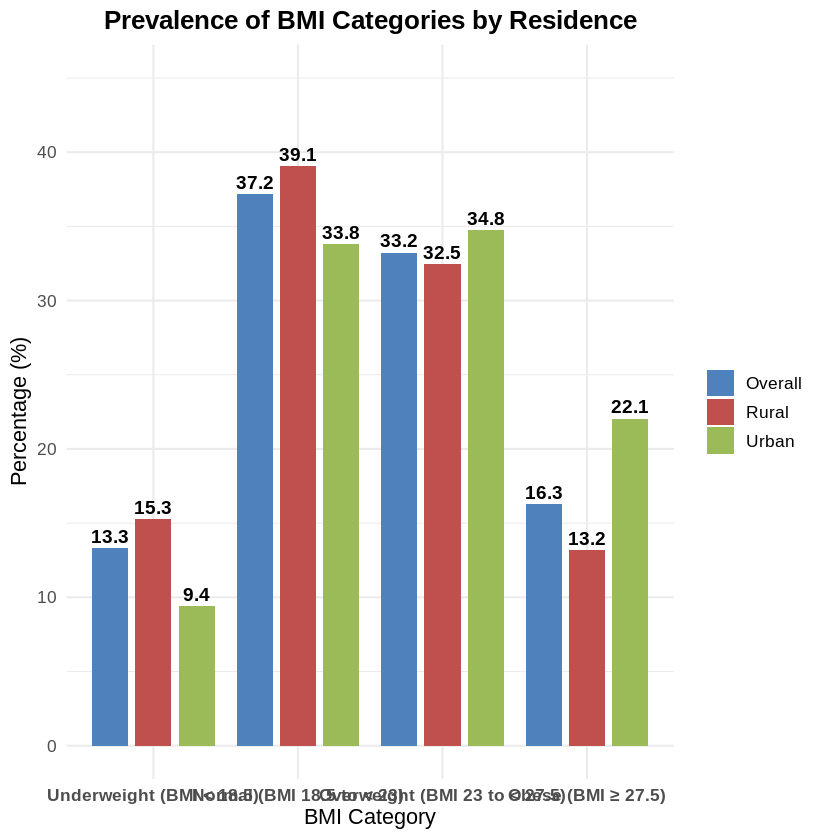

In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)

# Your updated BMI data with detailed labels and actual values
bmi_table <- data.frame(
  BMI_Category = c(
    "Underweight (BMI < 18.5)",
    "Normal (BMI 18.5 to < 23)",
    "Overweight (BMI 23 to < 27.5)",
    "Obese (BMI ≥ 27.5)"
  ),
  Overall = c(13.30, 37.20, 33.23, 16.27),
  Rural   = c(15.28, 39.07, 32.48, 13.18),
  Urban   = c(9.40, 33.78, 34.77, 22.05)
)

# Convert to long format for ggplot
bmi_long <- bmi_table %>%
  pivot_longer(cols = c("Overall", "Rural", "Urban"),
               names_to = "Residence", values_to = "Prevalence")

# Ensure BMI_Category is ordered correctly
bmi_long$BMI_Category <- factor(bmi_long$BMI_Category,
                                levels = c("Underweight (BMI < 18.5)",
                                           "Normal (BMI 18.5 to < 23)",
                                           "Overweight (BMI 23 to < 27.5)",
                                           "Obese (BMI ≥ 27.5)"))

bmi_long$Residence <- factor(bmi_long$Residence, levels = c("Overall", "Rural", "Urban"))

# Plot with bar values above
ggplot(bmi_long, aes(x = BMI_Category, y = Prevalence, fill = Residence)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), width = 0.75) +
  geom_text(aes(label = sprintf("%.1f", Prevalence)),
            position = position_dodge(width = 0.9),
            vjust = -0.4,
            size = 4,
            fontface = "bold") +
  labs(title = "Prevalence of BMI Categories by Residence",
       x = "BMI Category", y = "Percentage (%)") +
  scale_fill_manual(values = c("Overall" = "#4F81BD",   # Blue
                               "Rural" = "#C0504D",     # Red
                               "Urban" = "#9BBB59")) +  # Green
  theme_minimal(base_size = 13) +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5, face = "bold"),
        legend.title = element_blank(),
        plot.title = element_text(face = "bold", hjust = 0.5)) +
  ylim(0, 45)


## **Multinomial Logistic Regression for Rural, Urban, Overrall**

## **Rural**

In [ ]:
run_multinom_rural <- function(df, factor_vars, outcome_var = "bmi", ref_level = "Normal") {
  # Filter rural and set factor levels
  df_rural <- df %>% filter(area == "Rural")
  df_rural[[outcome_var]] <- factor(df_rural[[outcome_var]], levels = c(ref_level, "Underweight", "Overweight", "Obese"))

  # Convert predictors to factor
  for (v in factor_vars) {
    df_rural[[v]] <- as.factor(df_rural[[v]])
  }

  # 1. Univariate multinomial logistic regression for variable selection
  significant_vars <- c()
  for (var in factor_vars) {
    formula_uni <- as.formula(paste(outcome_var, "~", var))
    uni_model <- multinom(formula_uni, data = df_rural, trace = FALSE)
    sum_uni <- summary(uni_model)

    z_vals <- sum_uni$coefficients / sum_uni$standard.errors
    p_vals <- 2 * (1 - pnorm(abs(z_vals)))

    if (any(p_vals < 0.25)) {
      significant_vars <- c(significant_vars, var)
    }
  }

  # 2. Final multinomial logistic regression
  formula_final <- as.formula(paste(outcome_var, "~", paste(significant_vars, collapse = " + ")))
  final_model <- multinom(formula_final, data = df_rural, trace = FALSE)
  summary_final <- summary(final_model)

  coef_mat <- coef(final_model)
  se_mat <- summary_final$standard.errors
  z_vals <- coef_mat / se_mat
  p_vals <- 2 * (1 - pnorm(abs(z_vals)))

  AOR <- exp(coef_mat)
  lower_CI <- exp(coef_mat - 1.96 * se_mat)
  upper_CI <- exp(coef_mat + 1.96 * se_mat)

  # Prepare output dataframe with all outcomes and predictors
  results <- data.frame(
    Outcome = rep(rownames(coef_mat), each = ncol(coef_mat)),
    Predictor = rep(colnames(coef_mat), times = nrow(coef_mat)),
    Coef = as.vector(coef_mat),
    SE = as.vector(se_mat),
    z = as.vector(z_vals),
    p_value = as.vector(p_vals),
    AOR = as.vector(AOR),
    lower_95CI = as.vector(lower_CI),
    upper_95CI = as.vector(upper_CI)
  )

  # Add significance stars
  add_signif_stars <- function(p) {
    if (is.na(p)) return("")
    else if (p < 0.001) return("***")
    else if (p < 0.01) return("**")
    else if (p < 0.05) return("*")
    else return("")
  }
  results$signif <- sapply(results$p_value, add_signif_stars)
  results$p_value_with_signif <- paste0(round(results$p_value, 4), results$signif)

  # Split results by Outcome
  underweight_res <- results %>% filter(Outcome == "Underweight")
  overweight_res <- results %>% filter(Outcome == "Overweight")
  obese_res <- results %>% filter(Outcome == "Obese")

  # Return list of dataframes
  return(list(
    all_results = results,
    underweight = underweight_res,
    overweight = overweight_res,
    obese = obese_res
  ))
}


In [ ]:
factor_vars <- c('age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity',
                 'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media',
                 'husb_edu', 'hh_size', 'wealth', 'division')

results_list <- run_multinom_rural(df, factor_vars)

# # View Underweight results with stars
# print(results_list$underweight)

# # View Overweight results
# print(results_list$overweight)

# # View Obese results
# print(results_list$obese)


##Under weight

In [ ]:
results_list$underweight <- results_list$underweight %>%
  mutate(across(where(is.numeric), ~ round(., 3)))
# print(results_list$underweight)
print(results_list$underweight[, c("Predictor", "AOR", "p_value_with_signif", "lower_95CI", "upper_95CI")])

                  Predictor   AOR p_value_with_signif lower_95CI upper_95CI
1               (Intercept) 0.317            0.0018**      0.154      0.651
2              age_cat20–29 0.629              0.1024      0.360      1.097
3              age_cat30–39 0.182            2e-04***      0.075      0.440
4              age_cat40–49 0.568            0.0016**      0.399      0.808
5        religionNon-Muslim 1.757            0.0032**      1.207      2.558
6           eduNo education 3.291            0.0011**      1.611      6.719
7                eduPrimary 0.430                0***      0.286      0.645
8              eduSecondary 2.576                0***      1.738      3.819
9     occupNon-agricultural 6.004                0***      2.901     12.426
10         occupNot working 0.606             0.0368*      0.379      0.970
11    marriage_age≥20 years 2.580                0***      1.690      3.937
12 parity3 or more children 5.796                0***      2.730     12.308
13        pa

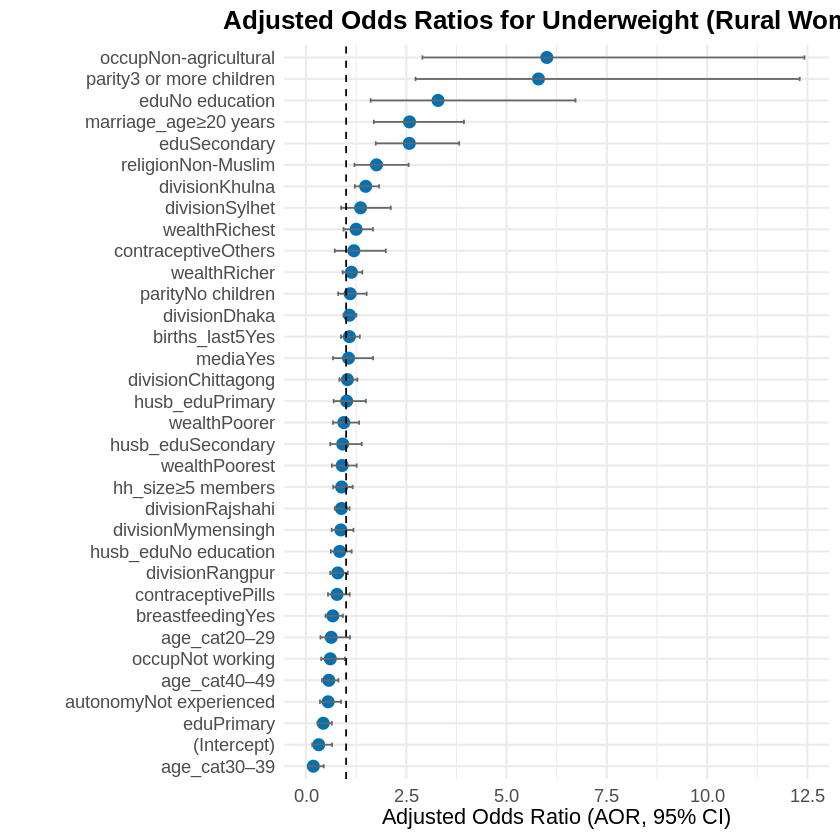

In [ ]:
# If you've stored your rural underweight results in:
underweight_rural <- results_list$underweight
library(ggplot2)
library(dplyr)
library(forcats)  # for reordering factors

# Clean and reorder by AOR
forest_data <- underweight_rural %>%
  mutate(Predictor = fct_reorder(Predictor, AOR))

# Plot
ggplot(forest_data, aes(x = AOR, y = Predictor)) +
  geom_point(color = "#0072B2", size = 3) +
  geom_errorbarh(aes(xmin = lower_95CI, xmax = upper_95CI), height = 0.2, color = "gray40") +
  geom_vline(xintercept = 1, linetype = "dashed", color = "black") +
  labs(title = "Adjusted Odds Ratios for Underweight (Rural Women)",
       x = "Adjusted Odds Ratio (AOR, 95% CI)", y = NULL) +
  theme_minimal(base_size = 13) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        axis.text = element_text(size = 11))


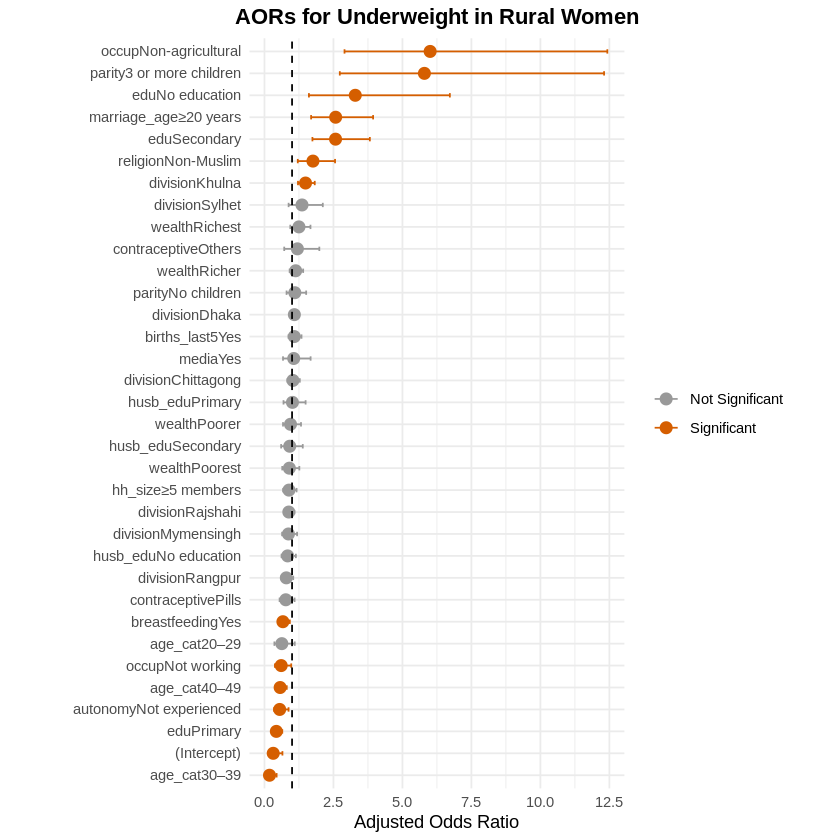

In [ ]:
forest_data <- forest_data %>%
  mutate(significant = ifelse(p_value < 0.05, "Significant", "Not Significant"))

ggplot(forest_data, aes(x = AOR, y = Predictor, color = significant)) +
  geom_point(size = 3) +
  geom_errorbarh(aes(xmin = lower_95CI, xmax = upper_95CI), height = 0.2) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "black") +
  scale_color_manual(values = c("Significant" = "#D55E00", "Not Significant" = "gray60")) +
  labs(title = "AORs for Underweight in Rural Women", x = "Adjusted Odds Ratio", y = "") +
  theme_minimal() +
  theme(legend.title = element_blank(),
        plot.title = element_text(face = "bold", hjust = 0.5))


In [ ]:
ggsave("forest_plot_underweight_rural.png", width = 8, height = 6, dpi = 600)


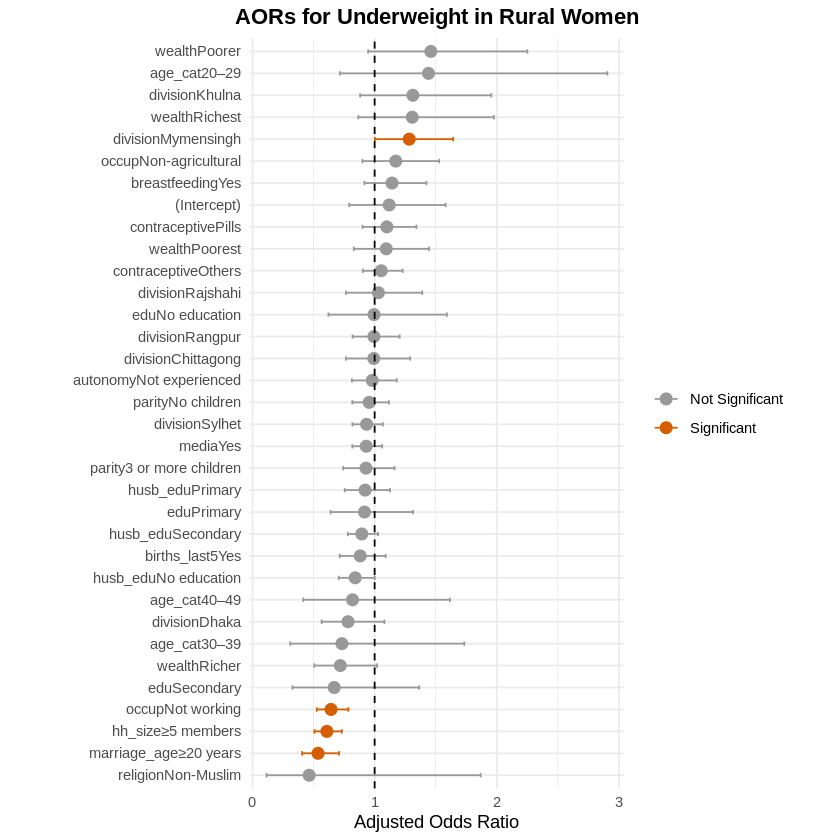

In [ ]:
# If you've stored your rural underweight results in:
underweight_rural <- results_list$overweight
library(ggplot2)
library(dplyr)
library(forcats)  # for reordering factors

# Clean and reorder by AOR
forest_data <- underweight_rural %>%
  mutate(Predictor = fct_reorder(Predictor, AOR))

forest_data <- forest_data %>%
  mutate(significant = ifelse(p_value < 0.05, "Significant", "Not Significant"))

ggplot(forest_data, aes(x = AOR, y = Predictor, color = significant)) +
  geom_point(size = 3) +
  geom_errorbarh(aes(xmin = lower_95CI, xmax = upper_95CI), height = 0.2) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "black") +
  scale_color_manual(values = c("Significant" = "#D55E00", "Not Significant" = "gray60")) +
  labs(title = "AORs for Underweight in Rural Women", x = "Adjusted Odds Ratio", y = "") +
  theme_minimal() +
  theme(legend.title = element_blank(),
        plot.title = element_text(face = "bold", hjust = 0.5))


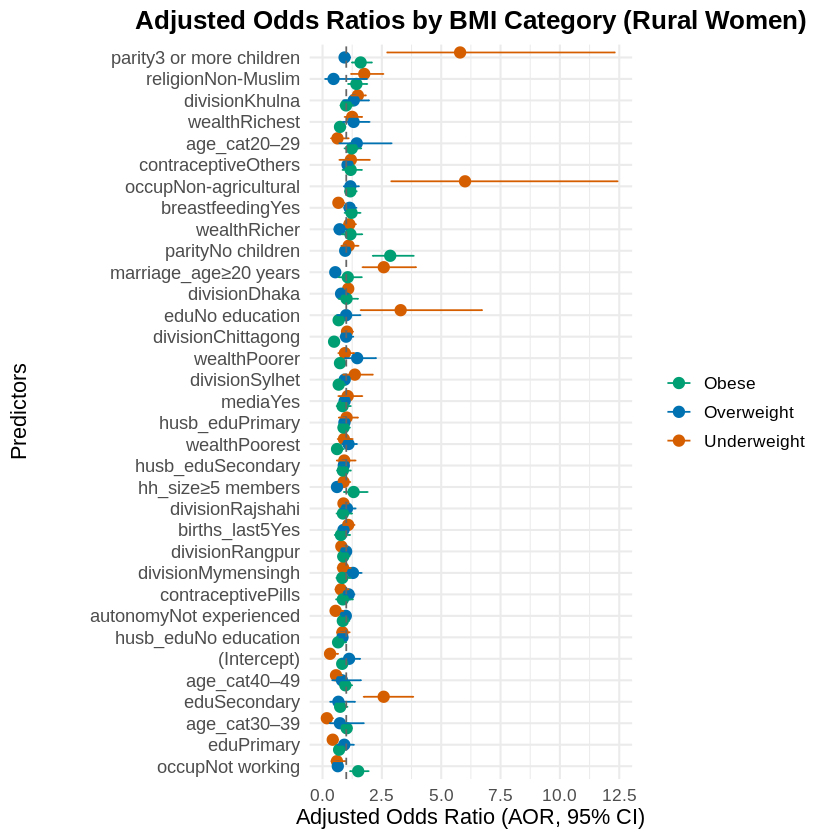

In [ ]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(forcats)



# Combine all categories into one dataframe
combined_results <- bind_rows(
  results_list$underweight %>% mutate(Category = "Underweight"),
  results_list$overweight %>% mutate(Category = "Overweight"),
  results_list$obese %>% mutate(Category = "Obese")
)

# Filter out any rows with NA AORs (optional)
combined_results <- combined_results %>% filter(!is.na(AOR))

# Order predictors within each category by AOR (for better visualization)
combined_results <- combined_results %>%
  mutate(Predictor = fct_reorder(Predictor, AOR))

# Create the combined forest plot
ggplot(combined_results, aes(x = AOR, y = Predictor, color = Category)) +
  geom_point(position = position_dodge(width = 0.7), size = 2.8) +
  geom_errorbarh(aes(xmin = lower_95CI, xmax = upper_95CI),
                 position = position_dodge(width = 0.7), height = 0.2) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "gray40") +
  labs(
    title = "Adjusted Odds Ratios by BMI Category (Rural Women)",
    x = "Adjusted Odds Ratio (AOR, 95% CI)", y = "Predictors"
  ) +
  scale_color_manual(values = c(
    "Underweight" = "#D55E00",
    "Overweight" = "#0072B2",
    "Obese" = "#009E73"
  )) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.title = element_blank(),
    axis.text.y = element_text(size = 11)
  )

# Optionally save the plot as a high-res PNG
ggsave("combined_forest_plot_rural_women.png", width = 10, height = 6, dpi = 600)


In [ ]:
install.packages("ggtext")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘litedown’, ‘markdown’, ‘png’, ‘jpeg’, ‘gridtext’




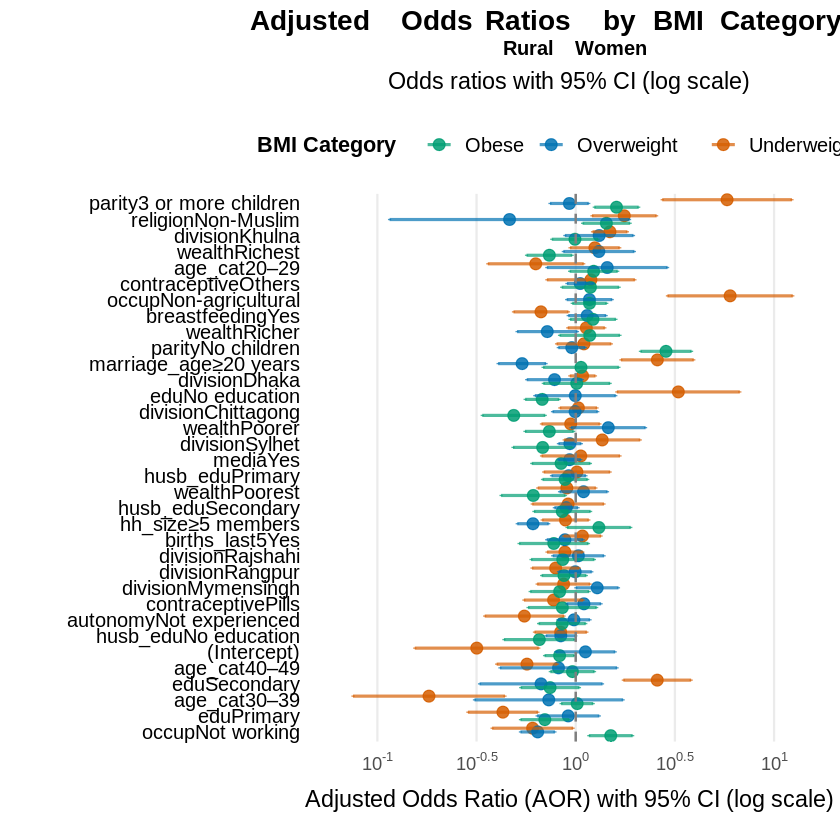

In [ ]:
library(dplyr)
library(ggplot2)
library(forcats)
library(ggtext)   # For nicer text formatting in titles and labels

# Combine all categories into one dataframe
combined_results <- bind_rows(
  results_list$underweight %>% mutate(Category = "Underweight"),
  results_list$overweight %>% mutate(Category = "Overweight"),
  results_list$obese %>% mutate(Category = "Obese")
)

# Filter out any rows with NA AORs (optional)
combined_results <- combined_results %>% filter(!is.na(AOR))

# Order predictors within each category by AOR (for better visualization)
combined_results <- combined_results %>%
  mutate(Predictor = fct_reorder(Predictor, AOR))

# Define category colors
category_colors <- c(
  "Underweight" = "#D55E00",  # Orange-red
  "Overweight" = "#0072B2",   # Blue
  "Obese" = "#009E73"         # Green
)

# Plot
p <- ggplot(combined_results, aes(x = AOR, y = Predictor, color = Category)) +
  geom_point(position = position_dodge(width = 0.7), size = 3, alpha = 0.85) +  # slightly larger points with some transparency
  geom_errorbarh(aes(xmin = lower_95CI, xmax = upper_95CI),
                 position = position_dodge(width = 0.7), height = 0.25, size = 0.9, alpha = 0.7) +  # thicker error bars with transparency
  geom_vline(xintercept = 1, linetype = "dashed", color = "gray50", size = 0.7) +  # vertical line at null effect
  scale_color_manual(values = category_colors) +

  # Add x-axis on log scale for odds ratios (better interpretability)
  scale_x_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
  ) +

  labs(
    title = "**Adjusted Odds Ratios by BMI Category** <br> <span style='font-size:12pt;'>Rural Women</span>",
    subtitle = "Odds ratios with 95% CI (log scale)",
    x = "Adjusted Odds Ratio (AOR) with 95% CI (log scale)",
    y = NULL,
    color = "BMI Category"
  ) +

  theme_minimal(base_size = 14) +

  theme(
    plot.title = element_markdown(hjust = 0.5, face = "bold"),  # markdown for bold + line break
    plot.subtitle = element_text(hjust = 0.5, margin = margin(b = 15)),
    legend.position = "top",
    legend.title = element_text(face = "bold", size = 13),
    legend.text = element_text(size = 12),
    axis.text.y = element_text(size = 12, color = "black"),
    axis.text.x = element_text(size = 11),
    axis.title.x = element_text(margin = margin(t = 10, b = 10)),
    panel.grid.minor = element_blank(),   # cleaner grid lines
    panel.grid.major.y = element_blank()  # hide horizontal grid lines for predictors
  ) +

  coord_cartesian(
    xlim = c(
      min(combined_results$lower_95CI, na.rm = TRUE) * 0.8,
      max(combined_results$upper_95CI, na.rm = TRUE) * 1.15
    )
  )

print(p)

# Optionally save the plot as high-res PNG
ggsave("combined_forest_plot_rural_women_professional.png", plot = p, width = 11, height = 7, dpi = 600)


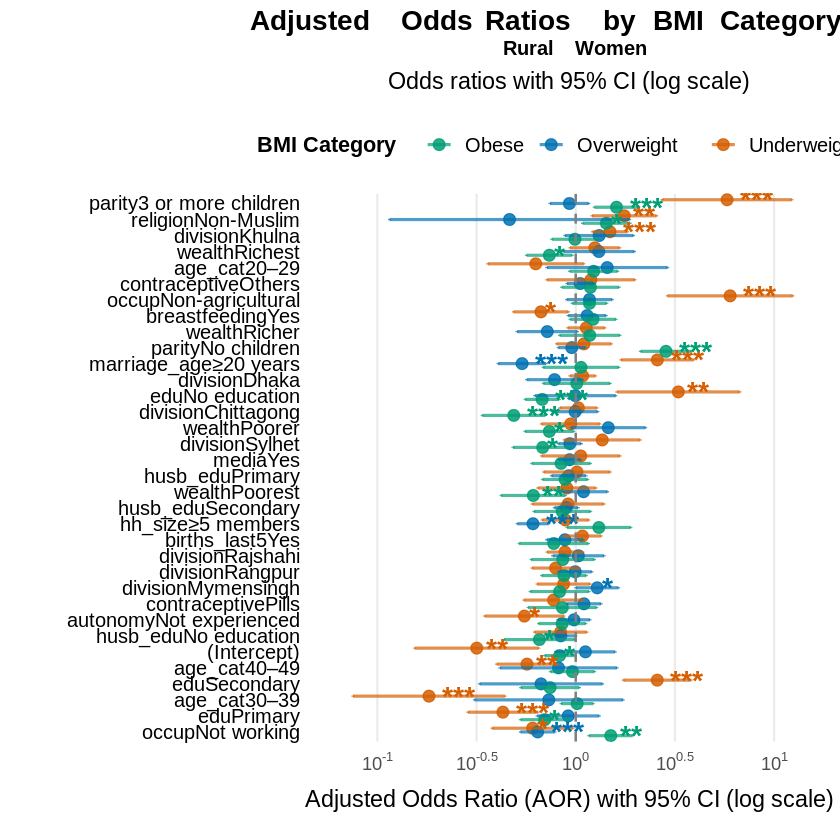

In [ ]:
library(dplyr)
library(ggplot2)
library(forcats)
library(ggtext)   # For markdown in titles

# Add significance stars function
add_significance <- function(p) {
  if (is.na(p)) return("")
  else if (p < 0.001) return("***")
  else if (p < 0.01) return("**")
  else if (p < 0.05) return("*")
  else return("")
}

# Combine all categories into one dataframe
combined_results <- bind_rows(
  results_list$underweight %>% mutate(Category = "Underweight"),
  results_list$overweight %>% mutate(Category = "Overweight"),
  results_list$obese %>% mutate(Category = "Obese")
)

# Filter out any rows with NA AORs (optional)
combined_results <- combined_results %>% filter(!is.na(AOR))

# Create significance stars column
combined_results <- combined_results %>% mutate(signif = sapply(p_value, add_significance))

# Order predictors within each category by AOR (for better visualization)
combined_results <- combined_results %>%
  mutate(Predictor = fct_reorder(Predictor, AOR))

# Define category colors
category_colors <- c(
  "Underweight" = "#D55E00",  # Orange-red
  "Overweight" = "#0072B2",   # Blue
  "Obese" = "#009E73"         # Green
)

# Plot
p <- ggplot(combined_results, aes(x = AOR, y = Predictor, color = Category)) +
  geom_point(position = position_dodge(width = 0.7), size = 3, alpha = 0.85) +  # slightly larger points with some transparency
  geom_errorbarh(aes(xmin = lower_95CI, xmax = upper_95CI),
                 position = position_dodge(width = 0.7), height = 0.25, size = 0.9, alpha = 0.7) +  # thicker error bars with transparency
  geom_text(aes(label = signif),
            position = position_dodge(width = 0.7),
            hjust = -0.4,   # place stars just to the right of points
            size = 6,
            fontface = "bold",
            show.legend = FALSE) +  # no legend for stars
  geom_vline(xintercept = 1, linetype = "dashed", color = "gray50", size = 0.7) +  # vertical line at null effect
  scale_color_manual(values = category_colors) +

  # Log scale for x-axis
  scale_x_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
  ) +

  labs(
    title = "**Adjusted Odds Ratios by BMI Category** <br> <span style='font-size:12pt;'>Rural Women</span>",
    subtitle = "Odds ratios with 95% CI (log scale)",
    x = "Adjusted Odds Ratio (AOR) with 95% CI (log scale)",
    y = NULL,
    color = "BMI Category"
  ) +

  theme_minimal(base_size = 14) +

  theme(
    plot.title = element_markdown(hjust = 0.5, face = "bold"),  # markdown for bold + line break
    plot.subtitle = element_text(hjust = 0.5, margin = margin(b = 15)),
    legend.position = "top",
    legend.title = element_text(face = "bold", size = 13),
    legend.text = element_text(size = 12),
    axis.text.y = element_text(size = 12, color = "black"),
    axis.text.x = element_text(size = 11),
    axis.title.x = element_text(margin = margin(t = 10, b = 10)),
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank()
  ) +

  coord_cartesian(
    xlim = c(
      min(combined_results$lower_95CI, na.rm = TRUE) * 0.8,
      max(combined_results$upper_95CI, na.rm = TRUE) * 1.15
    )
  )

print(p)

# Optionally save the plot as high-res PNG
ggsave("combined_forest_plot_rural_women_professional_with_stars.png", plot = p, width = 11, height = 7, dpi = 600)


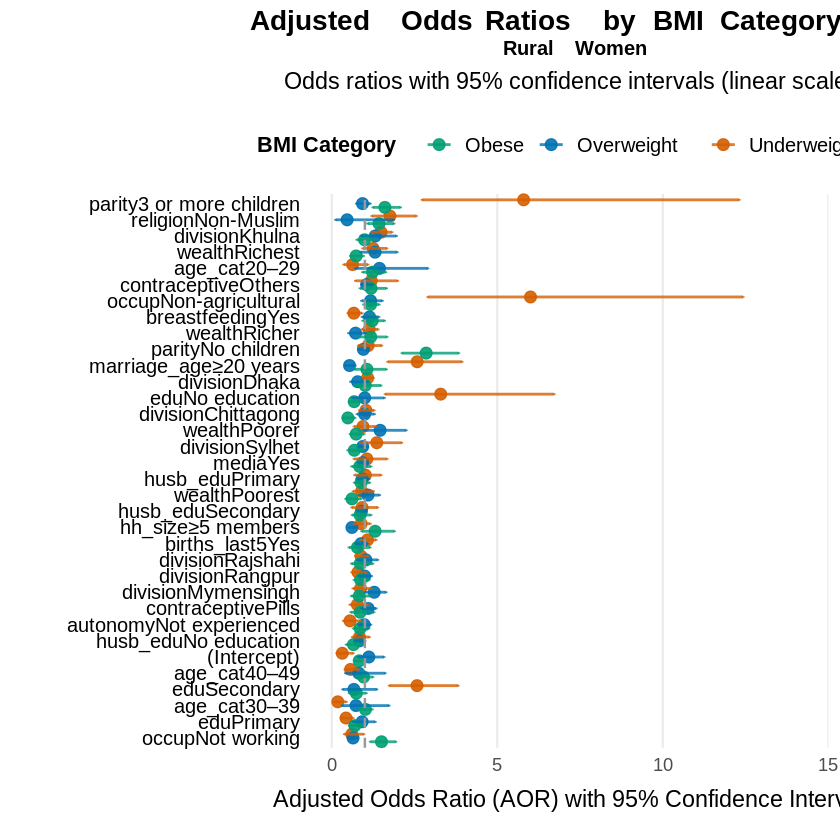

In [ ]:
library(dplyr)
library(ggplot2)
library(forcats)
library(ggtext)  # For markdown in title

# Combine all categories into one dataframe
combined_results <- bind_rows(
  results_list$underweight %>% mutate(Category = "Underweight"),
  results_list$overweight %>% mutate(Category = "Overweight"),
  results_list$obese %>% mutate(Category = "Obese")
)

# Filter out rows with missing AORs
combined_results <- combined_results %>% filter(!is.na(AOR))

# Order predictors by AOR (overall)
combined_results <- combined_results %>%
  mutate(Predictor = fct_reorder(Predictor, AOR))

# Define colors for categories
category_colors <- c(
  "Underweight" = "#D55E00",  # Orange-red
  "Overweight" = "#0072B2",   # Blue
  "Obese" = "#009E73"         # Green
)

# Plot
p <- ggplot(combined_results, aes(x = AOR, y = Predictor, color = Category)) +
  geom_point(position = position_dodge(width = 0.7), size = 3, alpha = 0.9) +
  geom_errorbarh(aes(xmin = lower_95CI, xmax = upper_95CI),
                 position = position_dodge(width = 0.7), height = 0.3, size = 0.8, alpha = 0.8) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "gray60", size = 0.7) +
  scale_color_manual(values = category_colors) +

  labs(
    title = "**Adjusted Odds Ratios by BMI Category** <br> <span style='font-size:12pt;'>Rural Women</span>",
    subtitle = "Odds ratios with 95% confidence intervals (linear scale)",
    x = "Adjusted Odds Ratio (AOR) with 95% Confidence Interval",
    y = NULL,
    color = "BMI Category"
  ) +

  theme_minimal(base_size = 14) +

  theme(
    plot.title = element_markdown(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, margin = margin(b = 15)),
    legend.position = "top",
    legend.title = element_text(face = "bold", size = 13),
    legend.text = element_text(size = 12),
    axis.text.y = element_text(size = 12, color = "black"),
    axis.text.x = element_text(size = 11),
    axis.title.x = element_text(margin = margin(t = 10, b = 10)),
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank()
  ) +

  coord_cartesian(
    xlim = c(
      max(0, min(combined_results$lower_95CI, na.rm = TRUE) * 0.8),  # Avoid going below zero on x-axis
      max(combined_results$upper_95CI, na.rm = TRUE) * 1.15
    )
  )

print(p)

# Save file (optional)
ggsave("combined_forest_plot_rural_women_linear.png", plot = p, width = 11, height = 7, dpi = 600)


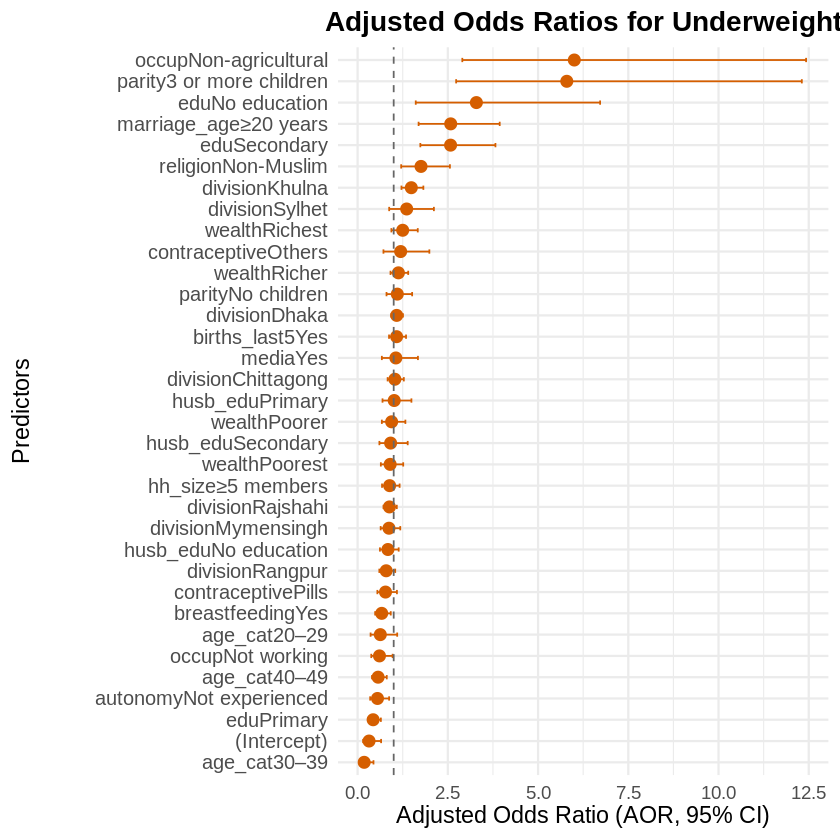

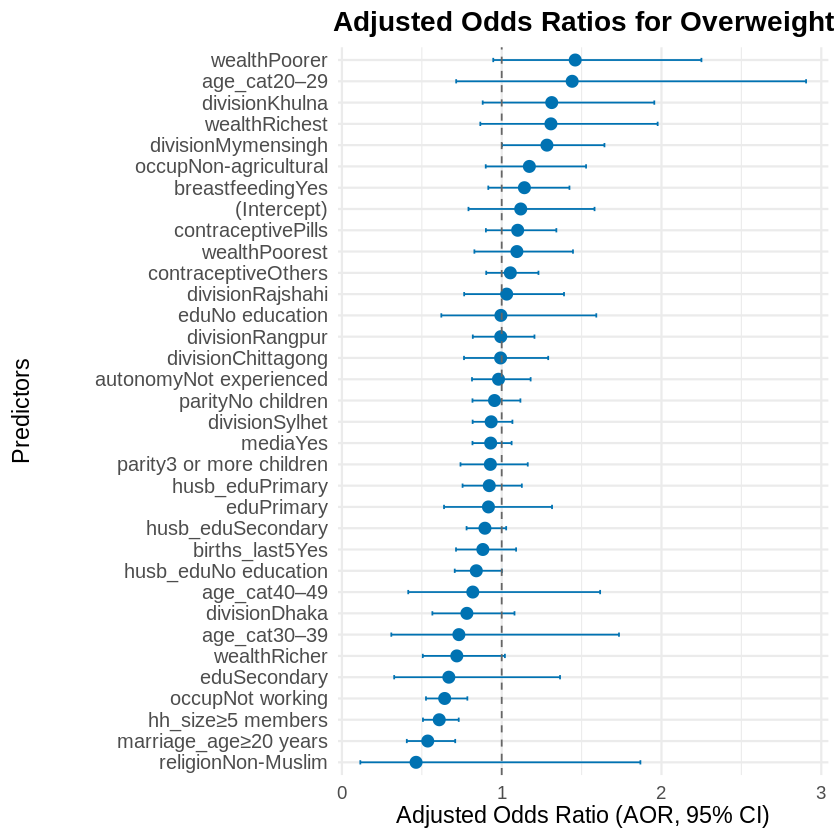

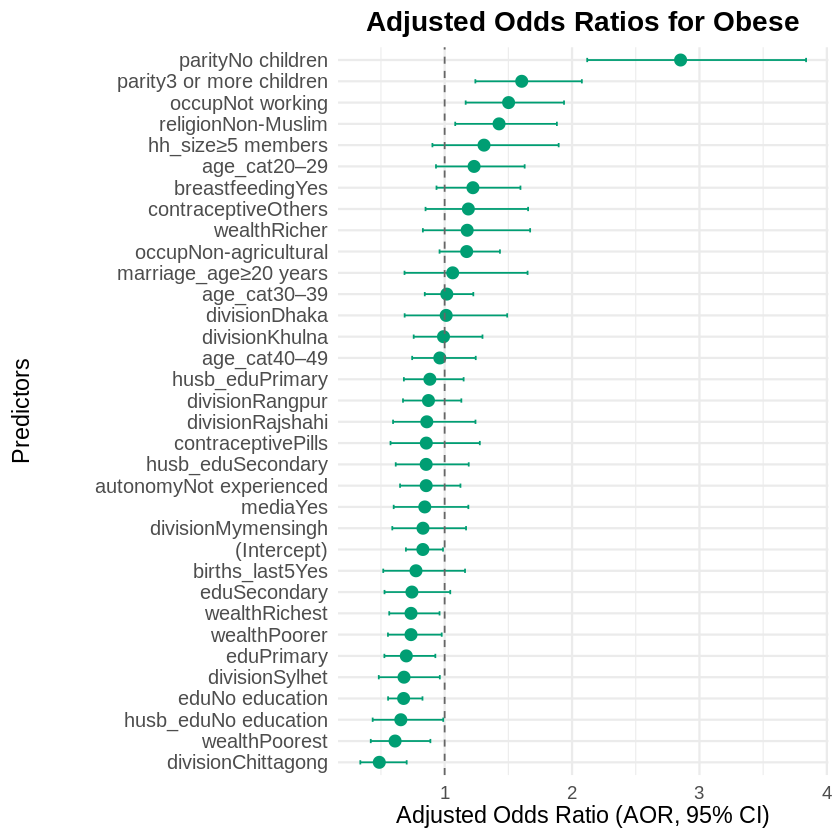

In [ ]:
library(ggplot2)
library(dplyr)
library(forcats)

# Example: your data frames for each category
# Replace these with your actual data frames
# Each should have columns: Predictor, AOR, lower_95CI, upper_95CI, p_value

plot_forest <- function(df, outcome_name, color="#0072B2") {
  df <- df %>%
    filter(!is.na(AOR)) %>%
    mutate(Predictor = fct_reorder(Predictor, AOR))

  ggplot(df, aes(x = AOR, y = Predictor)) +
    geom_point(color = color, size = 3) +
    geom_errorbarh(aes(xmin = lower_95CI, xmax = upper_95CI), height = 0.2, color = color) +
    geom_vline(xintercept = 1, linetype = "dashed", color = "gray40") +
    labs(
      title = paste("Adjusted Odds Ratios for", outcome_name),
      x = "Adjusted Odds Ratio (AOR, 95% CI)", y = "Predictors"
    ) +
    theme_minimal(base_size = 14) +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold"),
      axis.text.y = element_text(size = 12)
    )
}

# Plot each separately
p_underweight <- plot_forest(results_list$underweight, "Underweight", "#D55E00") # reddish
p_overweight  <- plot_forest(results_list$overweight,  "Overweight", "#0072B2")  # blue
p_obese       <- plot_forest(results_list$obese,       "Obese",      "#009E73")  # green

# To display each plot:
print(p_underweight)
print(p_overweight)
print(p_obese)

# Optional: save plots
ggsave("forestplot_underweight.png", p_underweight, width = 8, height = 6, dpi = 600)
ggsave("forestplot_overweight.png", p_overweight, width = 8, height = 6, dpi = 600)
ggsave("forestplot_obese.png", p_obese, width = 8, height = 6, dpi = 600)


In [ ]:
results_list$underweight <- results_list$underweight %>%
  mutate(
    across(where(is.numeric), ~ round(., 2)),

    CI_combined = paste0("[", lower_95CI, ",", upper_95CI, "]"),
    AOR_with_CI = paste0(AOR, CI_combined)
  )

print(results_list$underweight[, c("Predictor", "AOR_with_CI", "p_value_with_signif")])

                  Predictor     AOR_with_CI p_value_with_signif
1               (Intercept) 0.32[0.15,0.65]            0.0018**
2              age_cat20–29  0.63[0.36,1.1]              0.1024
3              age_cat30–39 0.18[0.07,0.44]            2e-04***
4              age_cat40–49  0.57[0.4,0.81]            0.0016**
5        religionNon-Muslim 1.76[1.21,2.56]            0.0032**
6           eduNo education 3.29[1.61,6.72]            0.0011**
7                eduPrimary 0.43[0.29,0.64]                0***
8              eduSecondary 2.58[1.74,3.82]                0***
9     occupNon-agricultural    6[2.9,12.43]                0***
10         occupNot working 0.61[0.38,0.97]             0.0368*
11    marriage_age≥20 years 2.58[1.69,3.94]                0***
12 parity3 or more children 5.8[2.73,12.31]                0***
13        parityNo children   1.1[0.8,1.51]              0.5568
14          births_last5Yes 1.08[0.87,1.34]              0.4804
15         breastfeedingYes 0.67[0.49,0.

##overweight

In [ ]:
results_list$overweight <- results_list$overweight %>%
  mutate(across(where(is.numeric), ~ round(., 3)))
# print(results_list$overweight)
print(results_list$overweight[, c("Predictor", "AOR", "p_value_with_signif", "lower_95CI", "upper_95CI")])


                  Predictor   AOR p_value_with_signif lower_95CI upper_95CI
1               (Intercept) 1.119              0.5223      0.792      1.581
2              age_cat20–29 1.441              0.3068      0.715      2.905
3              age_cat30–39 0.732              0.4776      0.309      1.734
4              age_cat40–49 0.819              0.5645      0.415      1.616
5        religionNon-Muslim 0.464              0.2797      0.115      1.868
6           eduNo education 0.995              0.9831      0.622      1.592
7                eduPrimary 0.917               0.636      0.639      1.315
8              eduSecondary 0.669              0.2688      0.327      1.365
9     occupNon-agricultural 1.173              0.2374      0.900      1.528
10         occupNot working 0.643                0***      0.526      0.785
11    marriage_age≥20 years 0.537                0***      0.406      0.709
12 parity3 or more children 0.929              0.5214      0.742      1.163
13        pa

In [ ]:
results_list$overweight <- results_list$overweight %>%
  mutate(
    across(where(is.numeric), ~ round(., 2)),

    CI_combined = paste0("[", lower_95CI, ",", upper_95CI, "]"),
    AOR_with_CI = paste0(AOR, CI_combined)
  )

print(results_list$overweight[, c("Predictor", "AOR_with_CI", "p_value_with_signif")])

                  Predictor     AOR_with_CI p_value_with_signif
1               (Intercept) 1.12[0.79,1.58]              0.5223
2              age_cat20–29  1.44[0.72,2.9]              0.3068
3              age_cat30–39 0.73[0.31,1.73]              0.4776
4              age_cat40–49 0.82[0.42,1.62]              0.5645
5        religionNon-Muslim 0.46[0.12,1.87]              0.2797
6           eduNo education    1[0.62,1.59]              0.9831
7                eduPrimary 0.92[0.64,1.31]               0.636
8              eduSecondary 0.67[0.33,1.36]              0.2688
9     occupNon-agricultural  1.17[0.9,1.53]              0.2374
10         occupNot working 0.64[0.53,0.78]                0***
11    marriage_age≥20 years 0.54[0.41,0.71]                0***
12 parity3 or more children 0.93[0.74,1.16]              0.5214
13        parityNo children 0.96[0.82,1.12]              0.5659
14          births_last5Yes 0.88[0.71,1.09]              0.2453
15         breastfeedingYes 1.14[0.92,1.

##Obese

In [ ]:
results_list$obese <- results_list$obese %>%
  mutate(across(where(is.numeric), ~ round(., 3)))
# print(results_list$overweight)
print(results_list$obese[, c("Predictor", "AOR", "p_value_with_signif", "lower_95CI", "upper_95CI")])


                  Predictor   AOR p_value_with_signif lower_95CI upper_95CI
1               (Intercept) 0.829             0.0355*      0.696      0.987
2              age_cat20–29 1.231              0.1438      0.932      1.628
3              age_cat30–39 1.017              0.8606      0.844      1.225
4              age_cat40–49 0.962              0.7703      0.745      1.244
5        religionNon-Muslim 1.427             0.0116*      1.083      1.881
6           eduNo education 0.678            1e-04***      0.556      0.826
7                eduPrimary 0.699             0.0129*      0.527      0.927
8              eduSecondary 0.743              0.0871      0.528      1.044
9     occupNon-agricultural 1.173              0.1178      0.960      1.434
10         occupNot working 1.502            0.0017**      1.165      1.937
11    marriage_age≥20 years 1.063              0.7851      0.685      1.651
12 parity3 or more children 1.605            3e-04***      1.241      2.077
13        pa

In [ ]:
results_list$obese <- results_list$obese %>%
  mutate(
    across(where(is.numeric), ~ round(., 2)),

    CI_combined = paste0("[", lower_95CI, ",", upper_95CI, "]"),
    AOR_with_CI = paste0(AOR, CI_combined)
  )

print(results_list$obese[, c("Predictor", "AOR_with_CI", "p_value_with_signif")])

                  Predictor     AOR_with_CI p_value_with_signif
1               (Intercept)  0.83[0.7,0.99]             0.0355*
2              age_cat20–29 1.23[0.93,1.63]              0.1438
3              age_cat30–39 1.02[0.84,1.23]              0.8606
4              age_cat40–49 0.96[0.74,1.24]              0.7703
5        religionNon-Muslim 1.43[1.08,1.88]             0.0116*
6           eduNo education 0.68[0.56,0.83]            1e-04***
7                eduPrimary  0.7[0.53,0.93]             0.0129*
8              eduSecondary 0.74[0.53,1.04]              0.0871
9     occupNon-agricultural 1.17[0.96,1.43]              0.1178
10         occupNot working  1.5[1.17,1.94]            0.0017**
11    marriage_age≥20 years 1.06[0.69,1.65]              0.7851
12 parity3 or more children  1.6[1.24,2.08]            3e-04***
13        parityNo children 2.85[2.12,3.84]                0***
14          births_last5Yes 0.78[0.52,1.16]              0.2151
15         breastfeedingYes 1.22[0.94,1.

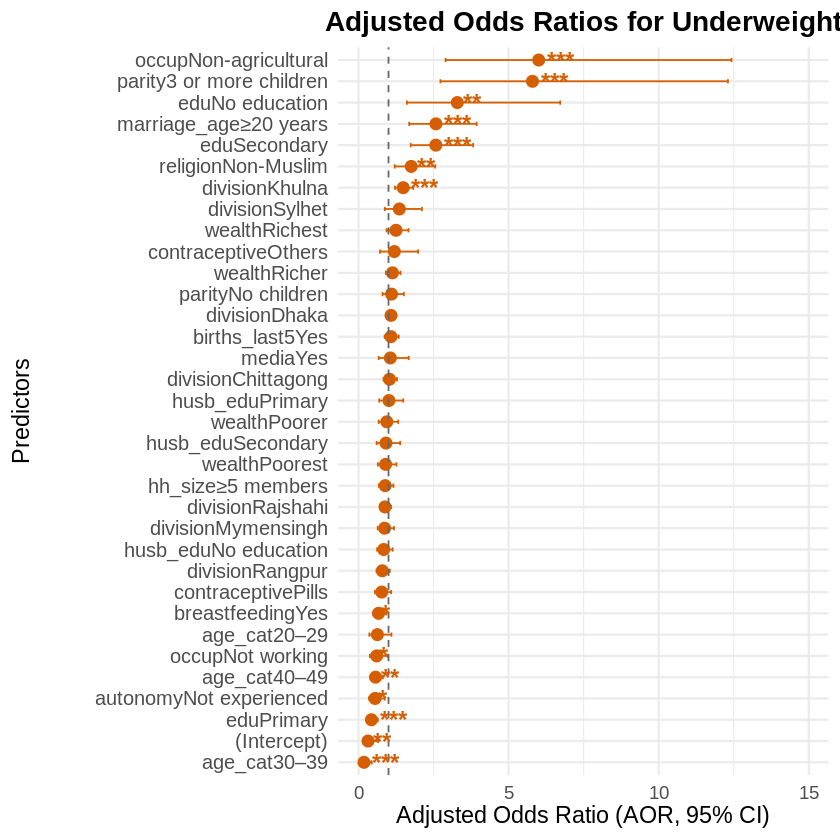

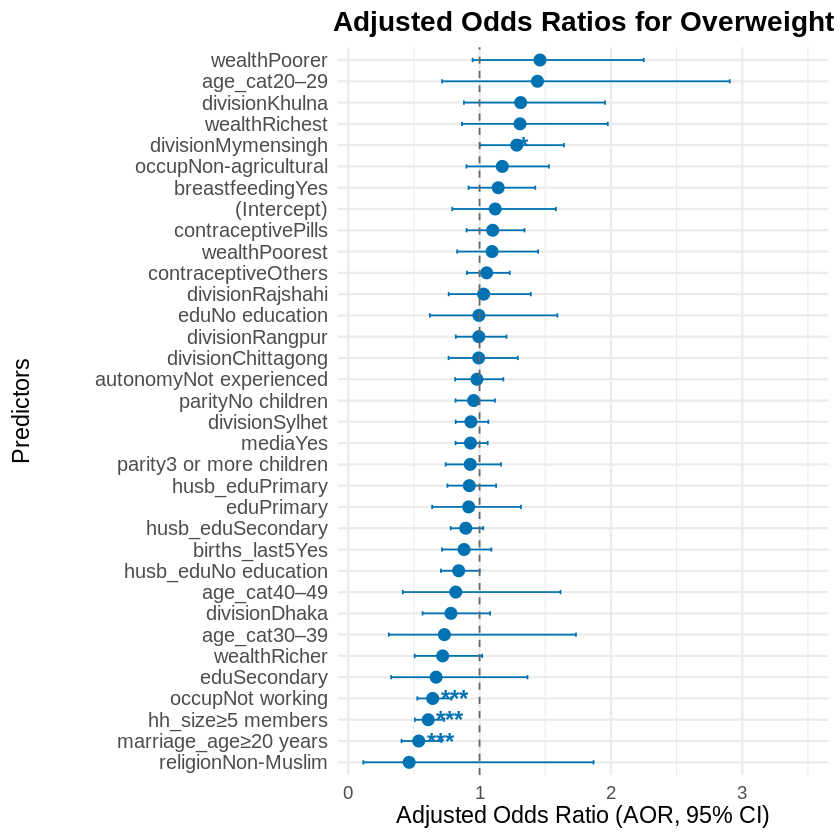

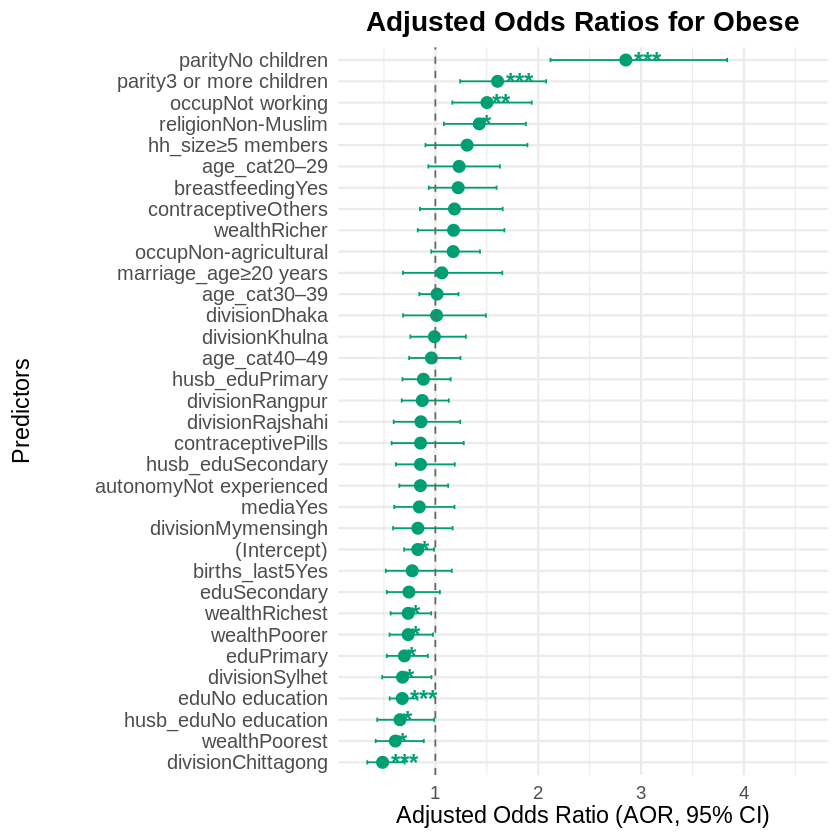

In [ ]:
library(ggplot2)
library(dplyr)
library(forcats)

# Function to add significance stars based on p-value
add_significance <- function(p) {
  if (is.na(p)) return("")
  else if (p < 0.001) return("***")
  else if (p < 0.01) return("**")
  else if (p < 0.05) return("*")
  else return("")
}

plot_forest <- function(df, outcome_name, color="#0072B2") {
  df <- df %>%
    filter(!is.na(AOR)) %>%
    mutate(
      Predictor = fct_reorder(Predictor, AOR),
      signif = sapply(p_value, add_significance)
    )

  ggplot(df, aes(x = AOR, y = Predictor)) +
    geom_point(color = color, size = 3) +
    geom_errorbarh(aes(xmin = lower_95CI, xmax = upper_95CI), height = 0.2, color = color) +
    geom_vline(xintercept = 1, linetype = "dashed", color = "gray40") +
    geom_text(aes(label = signif), hjust = -0.3, size = 5, color = color, fontface = "bold") +
    labs(
      title = paste("Adjusted Odds Ratios for", outcome_name),
      x = "Adjusted Odds Ratio (AOR, 95% CI)", y = "Predictors"
    ) +
    theme_minimal(base_size = 14) +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold"),
      axis.text.y = element_text(size = 12)
    ) +
    coord_cartesian(xlim = c(min(df$lower_95CI, na.rm = TRUE) * 0.8, max(df$upper_95CI, na.rm = TRUE) * 1.2))
}

# Example usage assuming results_list contains your data frames:
# results_list$underweight, results_list$overweight, results_list$obese

p_underweight <- plot_forest(results_list$underweight, "Underweight", "#D55E00") # reddish
p_overweight  <- plot_forest(results_list$overweight,  "Overweight", "#0072B2")  # blue
p_obese       <- plot_forest(results_list$obese,       "Obese",      "#009E73")  # green

print(p_underweight)
print(p_overweight)
print(p_obese)

# Save plots
ggsave("forestplot_underweight.png", p_underweight, width = 8, height = 6, dpi = 600)
ggsave("forestplot_overweight.png", p_overweight, width = 8, height = 6, dpi = 600)
ggsave("forestplot_obese.png", p_obese, width = 8, height = 6, dpi = 600)


## **Urban**

In [ ]:
run_multinom_urban <- function(df, factor_vars, outcome_var = "bmi", ref_level = "Normal") {
  # Filter urban and set factor levels
  df_urban <- df %>% filter(area == "Urban")
  df_urban[[outcome_var]] <- factor(df_urban[[outcome_var]], levels = c(ref_level, "Underweight", "Overweight", "Obese"))

  # Convert predictors to factor
  for (v in factor_vars) {
    df_urban[[v]] <- as.factor(df_urban[[v]])
  }

  # 1. Univariate multinomial logistic regression for variable selection
  significant_vars <- c()
  for (var in factor_vars) {
    formula_uni <- as.formula(paste(outcome_var, "~", var))
    uni_model <- multinom(formula_uni, data = df_urban, trace = FALSE)
    sum_uni <- summary(uni_model)

    z_vals <- sum_uni$coefficients / sum_uni$standard.errors
    p_vals <- 2 * (1 - pnorm(abs(z_vals)))

    if (any(p_vals < 0.25)) {
      significant_vars <- c(significant_vars, var)
    }
  }

  # 2. Final multinomial logistic regression
  formula_final <- as.formula(paste(outcome_var, "~", paste(significant_vars, collapse = " + ")))
  final_model <- multinom(formula_final, data = df_urban, trace = FALSE)
  summary_final <- summary(final_model)

  coef_mat <- coef(final_model)
  se_mat <- summary_final$standard.errors
  z_vals <- coef_mat / se_mat
  p_vals <- 2 * (1 - pnorm(abs(z_vals)))

  AOR <- exp(coef_mat)
  lower_CI <- exp(coef_mat - 1.96 * se_mat)
  upper_CI <- exp(coef_mat + 1.96 * se_mat)

  # Prepare output dataframe with all outcomes and predictors
  results <- data.frame(
    Outcome = rep(rownames(coef_mat), each = ncol(coef_mat)),
    Predictor = rep(colnames(coef_mat), times = nrow(coef_mat)),
    Coef = as.vector(coef_mat),
    SE = as.vector(se_mat),
    z = as.vector(z_vals),
    p_value = as.vector(p_vals),
    AOR = as.vector(AOR),
    lower_95CI = as.vector(lower_CI),
    upper_95CI = as.vector(upper_CI)
  )

  # Add significance stars
  add_signif_stars <- function(p) {
    if (is.na(p)) return("")
    else if (p < 0.001) return("***")
    else if (p < 0.01) return("**")
    else if (p < 0.05) return("*")
    else return("")
  }
  results$signif <- sapply(results$p_value, add_signif_stars)
  results$p_value_with_signif <- paste0(round(results$p_value, 4), results$signif)

  # Split results by Outcome
  underweight_res <- results %>% filter(Outcome == "Underweight")
  overweight_res <- results %>% filter(Outcome == "Overweight")
  obese_res <- results %>% filter(Outcome == "Obese")

  # Return list of dataframes
  return(list(
    all_results = results,
    underweight = underweight_res,
    overweight = overweight_res,
    obese = obese_res
  ))
}


In [ ]:
factor_vars <- c('age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity',
                 'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media',
                 'husb_edu', 'hh_size', 'wealth', 'division')

urban_results <- run_multinom_urban(df, factor_vars)



##Underweight

In [ ]:
urban_results$underweight <- urban_results$underweight %>%
  mutate(across(where(is.numeric), ~ round(., 3)))
# print(results_list$underweight)
print(urban_results$underweight[, c("Predictor", "AOR", "p_value_with_signif", "lower_95CI", "upper_95CI")])

                  Predictor   AOR p_value_with_signif lower_95CI upper_95CI
1               (Intercept) 0.150            0.0037**      0.042      0.540
2              age_cat20–29 0.565              0.1662      0.252      1.268
3              age_cat30–39 0.131            1e-04***      0.046      0.374
4              age_cat40–49 0.728              0.3009      0.400      1.328
5        religionNon-Muslim 2.534            7e-04***      1.479      4.342
6           eduNo education 3.766            0.001***      1.712      8.287
7                eduPrimary 0.526              0.0738      0.260      1.064
8              eduSecondary 4.007                0***      2.274      7.064
9     occupNon-agricultural 7.200                0***      3.203     16.186
10         occupNot working 0.679              0.3534      0.299      1.539
11    marriage_age≥20 years 4.738                0***      2.574      8.722
12 parity3 or more children 9.123                0***      3.918     21.244
13        pa

In [ ]:
urban_results$underweight <- urban_results$underweight %>%
  mutate(
    across(where(is.numeric), ~ round(., 2)),

    CI_combined = paste0("[", lower_95CI, ",", upper_95CI, "]"),
    AOR_with_CI = paste0(AOR, CI_combined)
  )

print(urban_results$underweight[, c("Predictor", "AOR_with_CI", "p_value_with_signif")])

                  Predictor       AOR_with_CI p_value_with_signif
1               (Intercept)   0.15[0.04,0.54]            0.0037**
2              age_cat20–29   0.56[0.25,1.27]              0.1662
3              age_cat30–39   0.13[0.05,0.37]            1e-04***
4              age_cat40–49    0.73[0.4,1.33]              0.3009
5        religionNon-Muslim   2.53[1.48,4.34]            7e-04***
6           eduNo education   3.77[1.71,8.29]            0.001***
7                eduPrimary   0.53[0.26,1.06]              0.0738
8              eduSecondary   4.01[2.27,7.06]                0***
9     occupNon-agricultural    7.2[3.2,16.19]                0***
10         occupNot working    0.68[0.3,1.54]              0.3534
11    marriage_age≥20 years   4.74[2.57,8.72]                0***
12 parity3 or more children  9.12[3.92,21.24]                0***
13        parityNo children   0.97[0.58,1.63]              0.9057
14          births_last5Yes   0.91[0.68,1.21]              0.5094
15        

##Overweight

In [ ]:
urban_results$overweight <- urban_results$overweight %>%
  mutate(across(where(is.numeric), ~ round(., 3)))
# print(results_list$overweight)
print(urban_results$overweight[, c("Predictor", "AOR", "p_value_with_signif", "lower_95CI", "upper_95CI")])


                  Predictor   AOR p_value_with_signif lower_95CI   upper_95CI
1               (Intercept) 0.778              0.5558      0.338 1.792000e+00
2              age_cat20–29 4.375              0.7846      0.000 1.728301e+05
3              age_cat30–39 0.041              0.7882      0.000 5.305164e+08
4              age_cat40–49 1.868              0.4614      0.354 9.849000e+00
5        religionNon-Muslim 0.048              0.7786      0.000 7.485231e+07
6           eduNo education 0.223              0.8006      0.000 2.544845e+04
7                eduPrimary 1.454              0.3898      0.620 3.410000e+00
8              eduSecondary 0.210              0.7726      0.000 8.308478e+03
9     occupNon-agricultural 1.148              0.5559      0.726 1.815000e+00
10         occupNot working 0.752              0.0504      0.565 1.000000e+00
11    marriage_age≥20 years 0.706             0.0453*      0.502 9.930000e-01
12 parity3 or more children 0.921              0.6794      0.622

In [ ]:
urban_results$overweight <- urban_results$overweight %>%
  mutate(
    across(where(is.numeric), ~ round(., 2)),

    CI_combined = paste0("[", lower_95CI, ",", upper_95CI, "]"),
    AOR_with_CI = paste0(AOR, CI_combined)
  )

print(urban_results$overweight[, c("Predictor", "AOR_with_CI", "p_value_with_signif")])

                  Predictor          AOR_with_CI p_value_with_signif
1               (Intercept)      0.78[0.34,1.79]              0.5558
2              age_cat20–29    4.38[0,172830.11]              0.7846
3              age_cat30–39 0.04[0,530516408.92]              0.7882
4              age_cat40–49      1.87[0.35,9.85]              0.4614
5        religionNon-Muslim  0.05[0,74852311.46]              0.7786
6           eduNo education     0.22[0,25448.45]              0.8006
7                eduPrimary      1.45[0.62,3.41]              0.3898
8              eduSecondary      0.21[0,8308.48]              0.7726
9     occupNon-agricultural      1.15[0.73,1.81]              0.5559
10         occupNot working         0.75[0.56,1]              0.0504
11    marriage_age≥20 years       0.71[0.5,0.99]             0.0453*
12 parity3 or more children      0.92[0.62,1.36]              0.6794
13        parityNo children          1[0.8,1.25]              0.9955
14          births_last5Yes      0

##Obese

In [ ]:
urban_results$obese <- urban_results$obese %>%
  mutate(across(where(is.numeric), ~ round(., 3)))
# print(results_list$overweight)
print(urban_results$obese[, c("Predictor", "AOR", "p_value_with_signif", "lower_95CI", "upper_95CI")])


                  Predictor   AOR p_value_with_signif lower_95CI upper_95CI
1               (Intercept) 1.021              0.8452      0.826      1.263
2              age_cat20–29 1.362              0.2358      0.817      2.270
3              age_cat30–39 0.759              0.1187      0.537      1.073
4              age_cat40–49 0.938              0.7612      0.621      1.417
5        religionNon-Muslim 1.555               0.142      0.863      2.804
6           eduNo education 0.787              0.2734      0.513      1.208
7                eduPrimary 0.724               0.256      0.415      1.264
8              eduSecondary 1.166              0.5342      0.718      1.895
9     occupNon-agricultural 1.469            0.0063**      1.114      1.936
10         occupNot working 1.809            3e-04***      1.310      2.498
11    marriage_age≥20 years 1.006              0.9822      0.593      1.706
12 parity3 or more children 1.659            6e-04***      1.245      2.211
13        pa

In [ ]:
urban_results$obese <- urban_results$obese %>%
  mutate(
    across(where(is.numeric), ~ round(., 2)),

    CI_combined = paste0("[", lower_95CI, ",", upper_95CI, "]"),
    AOR_with_CI = paste0(AOR, CI_combined)
  )

print(urban_results$obese[, c("Predictor", "AOR_with_CI", "p_value_with_signif")])


                  Predictor     AOR_with_CI p_value_with_signif
1               (Intercept) 1.02[0.83,1.26]              0.8452
2              age_cat20–29 1.36[0.82,2.27]              0.2358
3              age_cat30–39 0.76[0.54,1.07]              0.1187
4              age_cat40–49 0.94[0.62,1.42]              0.7612
5        religionNon-Muslim  1.55[0.86,2.8]               0.142
6           eduNo education 0.79[0.51,1.21]              0.2734
7                eduPrimary 0.72[0.42,1.26]               0.256
8              eduSecondary  1.17[0.72,1.9]              0.5342
9     occupNon-agricultural 1.47[1.11,1.94]            0.0063**
10         occupNot working  1.81[1.31,2.5]            3e-04***
11    marriage_age≥20 years 1.01[0.59,1.71]              0.9822
12 parity3 or more children 1.66[1.25,2.21]            6e-04***
13        parityNo children 2.38[1.72,3.31]                0***
14          births_last5Yes 1.45[0.71,2.98]              0.3117
15         breastfeedingYes 0.84[0.58,1.

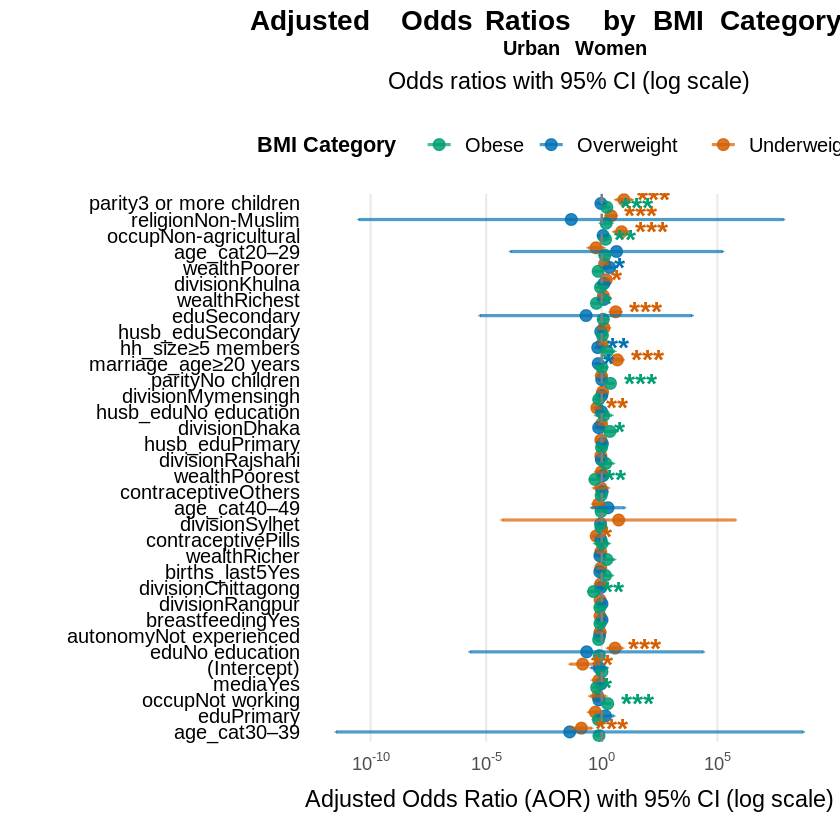

In [ ]:
library(dplyr)
library(ggplot2)
library(forcats)
library(ggtext)   # For markdown in titles

# Add significance stars function
add_significance <- function(p) {
  if (is.na(p)) return("")
  else if (p < 0.001) return("***")
  else if (p < 0.01) return("**")
  else if (p < 0.05) return("*")
  else return("")
}

# Combine all categories into one dataframe
combined_results <- bind_rows(
  urban_results$underweight %>% mutate(Category = "Underweight"),
  urban_results$overweight %>% mutate(Category = "Overweight"),
  urban_results$obese %>% mutate(Category = "Obese")
)

# Filter out any rows with NA AORs (optional)
combined_results <- combined_results %>% filter(!is.na(AOR))

# Create significance stars column
combined_results <- combined_results %>% mutate(signif = sapply(p_value, add_significance))

# Order predictors within each category by AOR (for better visualization)
combined_results <- combined_results %>%
  mutate(Predictor = fct_reorder(Predictor, AOR))

# Define category colors
category_colors <- c(
  "Underweight" = "#D55E00",  # Orange-red
  "Overweight" = "#0072B2",   # Blue
  "Obese" = "#009E73"         # Green
)

# Plot
p <- ggplot(combined_results, aes(x = AOR, y = Predictor, color = Category)) +
  geom_point(position = position_dodge(width = 0.7), size = 3, alpha = 0.85) +  # slightly larger points with some transparency
  geom_errorbarh(aes(xmin = lower_95CI, xmax = upper_95CI),
                 position = position_dodge(width = 0.7), height = 0.25, size = 0.9, alpha = 0.7) +  # thicker error bars with transparency
  geom_text(aes(label = signif),
            position = position_dodge(width = 0.7),
            hjust = -0.4,   # place stars just to the right of points
            size = 6,
            fontface = "bold",
            show.legend = FALSE) +  # no legend for stars
  geom_vline(xintercept = 1, linetype = "dashed", color = "gray50", size = 0.7) +  # vertical line at null effect
  scale_color_manual(values = category_colors) +

  # Log scale for x-axis
  scale_x_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
  ) +

  labs(
    title = "**Adjusted Odds Ratios by BMI Category** <br> <span style='font-size:12pt;'>Urban Women</span>",
    subtitle = "Odds ratios with 95% CI (log scale)",
    x = "Adjusted Odds Ratio (AOR) with 95% CI (log scale)",
    y = NULL,
    color = "BMI Category"
  ) +

  theme_minimal(base_size = 14) +

  theme(
    plot.title = element_markdown(hjust = 0.5, face = "bold"),  # markdown for bold + line break
    plot.subtitle = element_text(hjust = 0.5, margin = margin(b = 15)),
    legend.position = "top",
    legend.title = element_text(face = "bold", size = 13),
    legend.text = element_text(size = 12),
    axis.text.y = element_text(size = 12, color = "black"),
    axis.text.x = element_text(size = 11),
    axis.title.x = element_text(margin = margin(t = 10, b = 10)),
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank()
  ) +

  coord_cartesian(
    xlim = c(
      min(combined_results$lower_95CI, na.rm = TRUE) * 0.8,
      max(combined_results$upper_95CI, na.rm = TRUE) * 1.15
    )
  )

print(p)

# Optionally save the plot as high-res PNG
ggsave("combined_forest_plot_urban_women_professional_with_stars.png", plot = p, width = 11, height = 7, dpi = 600)


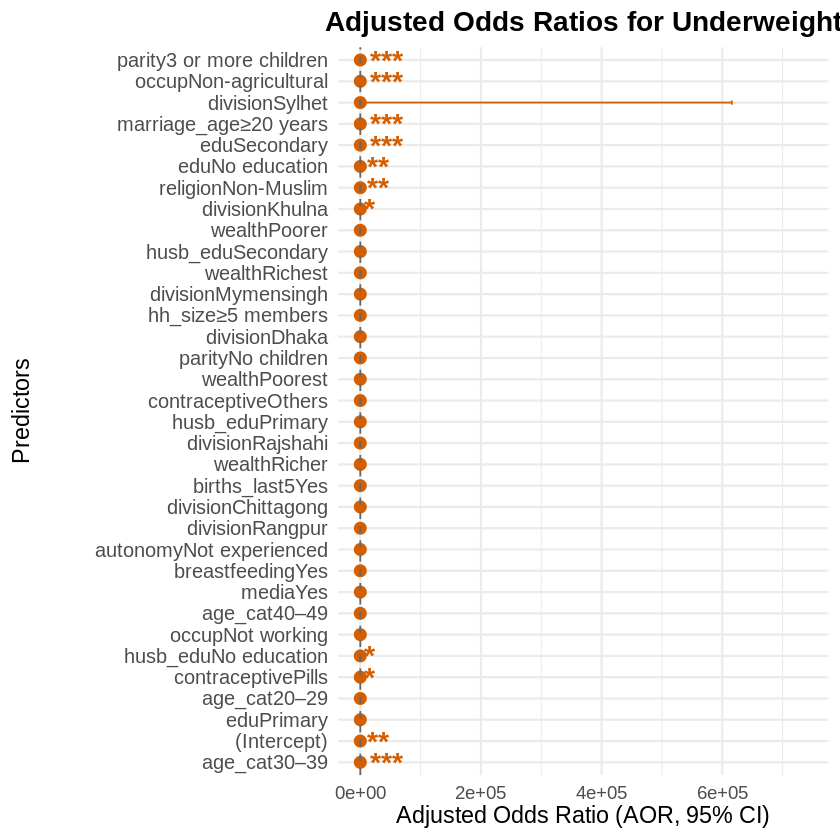

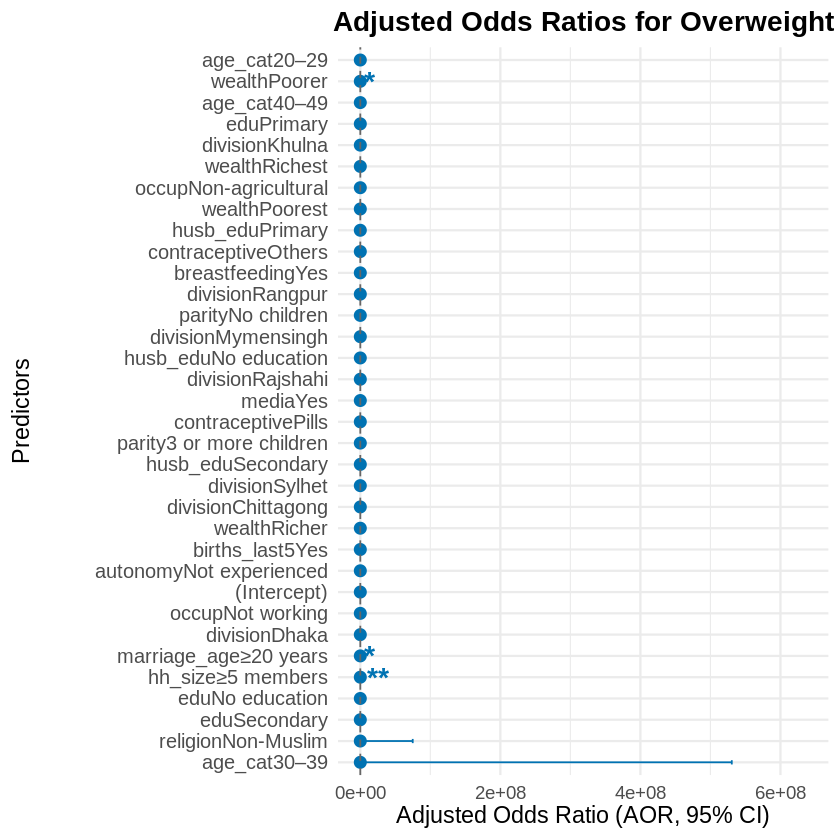

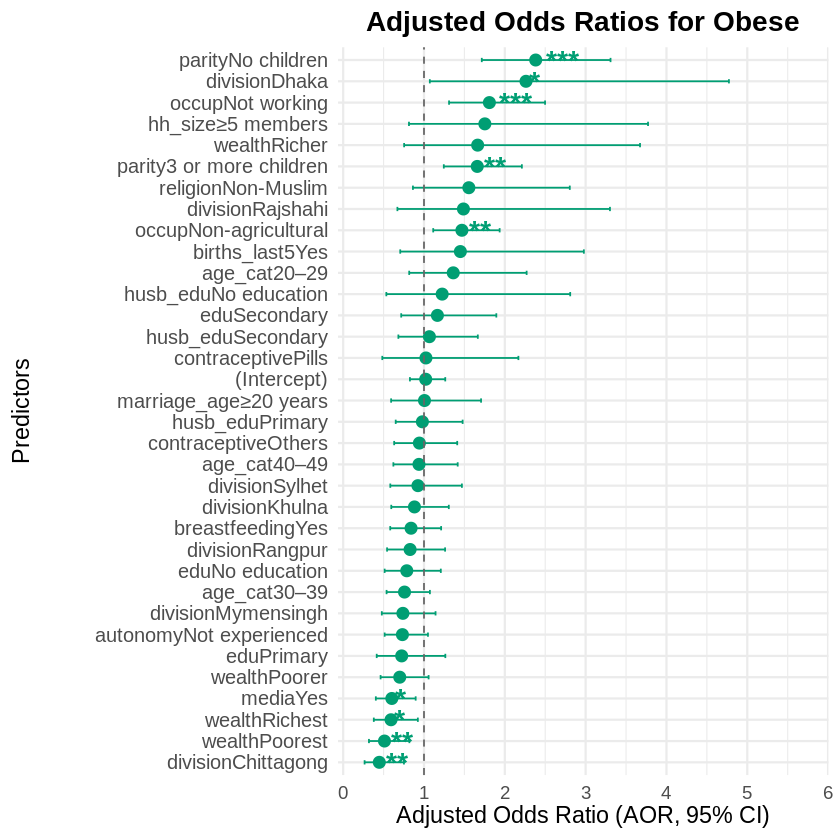

In [ ]:
library(ggplot2)
library(dplyr)
library(forcats)

# Function to add significance stars based on p-value
add_significance <- function(p) {
  if (is.na(p)) return("")
  else if (p < 0.001) return("***")
  else if (p < 0.01) return("**")
  else if (p < 0.05) return("*")
  else return("")
}

plot_forest <- function(df, outcome_name, color="#0072B2") {
  df <- df %>%
    filter(!is.na(AOR)) %>%
    mutate(
      Predictor = fct_reorder(Predictor, AOR),
      signif = sapply(p_value, add_significance)
    )

  ggplot(df, aes(x = AOR, y = Predictor)) +
    geom_point(color = color, size = 3) +
    geom_errorbarh(aes(xmin = lower_95CI, xmax = upper_95CI), height = 0.2, color = color) +
    geom_vline(xintercept = 1, linetype = "dashed", color = "gray40") +
    geom_text(aes(label = signif),
              hjust = -0.3,
              size = 6,
              color = color,
              fontface = "bold") +
    labs(
      title = paste("Adjusted Odds Ratios for", outcome_name),
      x = "Adjusted Odds Ratio (AOR, 95% CI)", y = "Predictors"
    ) +
    theme_minimal(base_size = 14) +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold"),
      axis.text.y = element_text(size = 12)
    ) +
    coord_cartesian(xlim = c(min(df$lower_95CI, na.rm = TRUE) * 0.8,
                             max(df$upper_95CI, na.rm = TRUE) * 1.2))
}

# Example usage with your results_list
p_underweight <- plot_forest(urban_results$underweight, "Underweight", "#D55E00") # reddish
p_overweight  <- plot_forest(urban_results$overweight,  "Overweight", "#0072B2")  # blue
p_obese       <- plot_forest(urban_results$obese,       "Obese",      "#009E73")  # green

print(p_underweight)
print(p_overweight)
print(p_obese)


## **Overrall**

In [ ]:
run_multinom_overall <- function(df, factor_vars, outcome_var = "bmi", ref_level = "Normal") {
  # Set factor levels for the outcome variable
  df[[outcome_var]] <- factor(df[[outcome_var]], levels = c(ref_level, "Underweight", "Overweight", "Obese"))

  # Convert predictors to factor
  for (v in factor_vars) {
    df[[v]] <- as.factor(df[[v]])
  }

  # 1. Univariate multinomial logistic regression for variable selection
  significant_vars <- c()
  for (var in factor_vars) {
    formula_uni <- as.formula(paste(outcome_var, "~", var))
    uni_model <- multinom(formula_uni, data = df, trace = FALSE)
    sum_uni <- summary(uni_model)

    z_vals <- sum_uni$coefficients / sum_uni$standard.errors
    p_vals <- 2 * (1 - pnorm(abs(z_vals)))

    if (any(p_vals < 0.25)) {
      significant_vars <- c(significant_vars, var)
    }
  }

  # 2. Final multinomial logistic regression
  formula_final <- as.formula(paste(outcome_var, "~", paste(significant_vars, collapse = " + ")))
  final_model <- multinom(formula_final, data = df, trace = FALSE)
  summary_final <- summary(final_model)

  coef_mat <- coef(final_model)
  se_mat <- summary_final$standard.errors
  z_vals <- coef_mat / se_mat
  p_vals <- 2 * (1 - pnorm(abs(z_vals)))

  AOR <- exp(coef_mat)
  lower_CI <- exp(coef_mat - 1.96 * se_mat)
  upper_CI <- exp(coef_mat + 1.96 * se_mat)

  # Prepare output dataframe with all outcomes and predictors
  results <- data.frame(
    Outcome = rep(rownames(coef_mat), each = ncol(coef_mat)),
    Predictor = rep(colnames(coef_mat), times = nrow(coef_mat)),
    Coef = as.vector(coef_mat),
    SE = as.vector(se_mat),
    z = as.vector(z_vals),
    p_value = as.vector(p_vals),
    AOR = as.vector(AOR),
    lower_95CI = as.vector(lower_CI),
    upper_95CI = as.vector(upper_CI)
  )

  # Add significance stars
  add_signif_stars <- function(p) {
    if (is.na(p)) return("")
    else if (p < 0.001) return("***")
    else if (p < 0.01) return("**")
    else if (p < 0.05) return("*")
    else return("")
  }
  results$signif <- sapply(results$p_value, add_signif_stars)
  results$p_value_with_signif <- paste0(round(results$p_value, 4), results$signif)

  # Split results by Outcome
  underweight_res <- results %>% filter(Outcome == "Underweight")
  overweight_res <- results %>% filter(Outcome == "Overweight")
  obese_res <- results %>% filter(Outcome == "Obese")

  # Return list of dataframes
  return(list(
    all_results = results,
    underweight = underweight_res,
    overweight = overweight_res,
    obese = obese_res
  ))
}


In [ ]:
factor_vars <- c('age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity',
                 'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media',
                 'husb_edu', 'hh_size', 'wealth', 'division')

overall_results <- run_multinom_overall(df, factor_vars)




##Underweight

In [ ]:
overall_results$underweight <- overall_results$underweight %>%
  mutate(across(where(is.numeric), ~ round(., 3)))
# print(results_list$underweight)
print(overall_results$underweight[, c("Predictor", "AOR", "p_value_with_signif", "lower_95CI", "upper_95CI")])

                  Predictor   AOR p_value_with_signif lower_95CI upper_95CI
1               (Intercept) 0.259                0***      0.140      0.479
2              age_cat20–29 0.631             0.0447*      0.403      0.989
3              age_cat30–39 0.155                0***      0.080      0.299
4              age_cat40–49 0.609            0.0012**      0.451      0.823
5        religionNon-Muslim 1.959                0***      1.442      2.662
6           eduNo education 3.349                0***      1.978      5.670
7                eduPrimary 0.457                0***      0.323      0.647
8              eduSecondary 2.931                0***      2.125      4.043
9     occupNon-agricultural 6.161                0***      3.599     10.546
10         occupNot working 0.642              0.031*      0.429      0.960
11    marriage_age≥20 years 3.111                0***      2.202      4.396
12 parity3 or more children 6.545                0***      3.748     11.430
13        pa

In [ ]:
overall_results$underweight <- overall_results$underweight %>%
  mutate(
    across(where(is.numeric), ~ round(., 3)),
    CI_combined = paste0(lower_95CI, ",", upper_95CI)
  )

# Now print with the new combined column
print(overall_results$underweight[, c("Predictor", "AOR", "p_value_with_signif", "CI_combined")])


                  Predictor   AOR p_value_with_signif  CI_combined
1               (Intercept) 0.259                0***   0.14,0.479
2              age_cat20–29 0.631             0.0447*  0.403,0.989
3              age_cat30–39 0.155                0***   0.08,0.299
4              age_cat40–49 0.609            0.0012**  0.451,0.823
5        religionNon-Muslim 1.959                0***  1.442,2.662
6           eduNo education 3.349                0***   1.978,5.67
7                eduPrimary 0.457                0***  0.323,0.647
8              eduSecondary 2.931                0***  2.125,4.043
9     occupNon-agricultural 6.161                0*** 3.599,10.546
10         occupNot working 0.642              0.031*   0.429,0.96
11    marriage_age≥20 years 3.111                0***  2.202,4.396
12 parity3 or more children 6.545                0***  3.748,11.43
13        parityNo children 1.061              0.6671  0.811,1.387
14          births_last5Yes 1.034              0.7008  0.871,1

##Overweight

In [ ]:
overall_results$overweight <- overall_results$overweight %>%
  mutate(across(where(is.numeric), ~ round(., 3)))
# print(results_list$overweight)
print(overall_results$overweight[, c("Predictor", "AOR", "p_value_with_signif", "lower_95CI", "upper_95CI")])


                  Predictor   AOR p_value_with_signif lower_95CI upper_95CI
1               (Intercept) 1.046               0.775      0.769      1.423
2              age_cat20–29 1.481              0.2665      0.741      2.961
3              age_cat30–39 0.725              0.4588      0.309      1.699
4              age_cat40–49 0.960              0.8949      0.522      1.764
5        religionNon-Muslim 0.423              0.2217      0.106      1.682
6           eduNo education 0.973              0.9076      0.617      1.536
7                eduPrimary 1.004              0.9809      0.729      1.383
8              eduSecondary 0.626              0.1909      0.311      1.263
9     occupNon-agricultural 1.161              0.1983      0.925      1.457
10         occupNot working 0.673                0***      0.572      0.792
11    marriage_age≥20 years 0.598                0***      0.483      0.740
12 parity3 or more children 0.913              0.3575      0.752      1.108
13        pa

In [ ]:
overall_results$overweight <- overall_results$overweight %>%
  mutate(
    across(where(is.numeric), ~ round(., 3)),
    CI_combined = paste0(lower_95CI, ",", upper_95CI)
  )

# Now print with the new combined column
print(overall_results$overweight[, c("Predictor", "AOR", "p_value_with_signif", "CI_combined")])


                  Predictor   AOR p_value_with_signif CI_combined
1               (Intercept) 1.046               0.775 0.769,1.423
2              age_cat20–29 1.481              0.2665 0.741,2.961
3              age_cat30–39 0.725              0.4588 0.309,1.699
4              age_cat40–49 0.960              0.8949 0.522,1.764
5        religionNon-Muslim 0.423              0.2217 0.106,1.682
6           eduNo education 0.973              0.9076 0.617,1.536
7                eduPrimary 1.004              0.9809 0.729,1.383
8              eduSecondary 0.626              0.1909 0.311,1.263
9     occupNon-agricultural 1.161              0.1983 0.925,1.457
10         occupNot working 0.673                0*** 0.572,0.792
11    marriage_age≥20 years 0.598                0***  0.483,0.74
12 parity3 or more children 0.913              0.3575 0.752,1.108
13        parityNo children 0.967              0.6018  0.85,1.098
14          births_last5Yes 0.850              0.048* 0.724,0.999
15        

In [ ]:
overall_results$overweight <- overall_results$overweight %>%
  mutate(
    across(where(is.numeric), ~ round(., 3)),
    CI_combined = paste0("[", lower_95CI, ",", upper_95CI, "]"),
    AOR_with_CI = paste0(AOR, "", CI_combined)
  )

# Print with the new combined column
print(overall_results$overweight[, c("Predictor", "AOR_with_CI", "p_value_with_signif")])


                  Predictor        AOR_with_CI p_value_with_signif
1               (Intercept) 1.046[0.769,1.423]               0.775
2              age_cat20–29 1.481[0.741,2.961]              0.2665
3              age_cat30–39 0.725[0.309,1.699]              0.4588
4              age_cat40–49  0.96[0.522,1.764]              0.8949
5        religionNon-Muslim 0.423[0.106,1.682]              0.2217
6           eduNo education 0.973[0.617,1.536]              0.9076
7                eduPrimary 1.004[0.729,1.383]              0.9809
8              eduSecondary 0.626[0.311,1.263]              0.1909
9     occupNon-agricultural 1.161[0.925,1.457]              0.1983
10         occupNot working 0.673[0.572,0.792]                0***
11    marriage_age≥20 years  0.598[0.483,0.74]                0***
12 parity3 or more children 0.913[0.752,1.108]              0.3575
13        parityNo children  0.967[0.85,1.098]              0.6018
14          births_last5Yes  0.85[0.724,0.999]              0.

##obesese

In [ ]:
overall_results$obese <- overall_results$obese %>%
  mutate(across(where(is.numeric), ~ round(., 3)))
# print(results_list$overweight)
print(overall_results$obese[, c("Predictor", "AOR", "p_value_with_signif", "lower_95CI", "upper_95CI")])


                  Predictor   AOR p_value_with_signif lower_95CI upper_95CI
1               (Intercept) 0.907              0.1475      0.794      1.035
2              age_cat20–29 1.295             0.0365*      1.016      1.649
3              age_cat30–39 0.982              0.8233      0.836      1.153
4              age_cat40–49 0.928              0.4926      0.749      1.150
5        religionNon-Muslim 1.540            4e-04***      1.210      1.960
6           eduNo education 0.714            1e-04***      0.601      0.849
7                eduPrimary 0.661            8e-04***      0.518      0.842
8              eduSecondary 0.862              0.2891      0.655      1.134
9     occupNon-agricultural 1.275             0.003**      1.086      1.496
10         occupNot working 1.634                0***      1.342      1.990
11    marriage_age≥20 years 0.965              0.8271      0.701      1.329
12 parity3 or more children 1.678                0***      1.401      2.009
13        pa

In [ ]:
overall_results$obese<- overall_results$obese %>%
  mutate(
    across(where(is.numeric), ~ round(., 3)),
    CI_combined = paste0("[", lower_95CI, ",", upper_95CI, "]"),
    AOR_with_CI = paste0(AOR, "", CI_combined)
  )

# Print with the new combined column
print(overall_results$obese[, c("Predictor", "AOR_with_CI", "p_value_with_signif")])


                  Predictor        AOR_with_CI p_value_with_signif
1               (Intercept) 0.907[0.794,1.035]              0.1475
2              age_cat20–29 1.295[1.016,1.649]             0.0365*
3              age_cat30–39 0.982[0.836,1.153]              0.8233
4              age_cat40–49  0.928[0.749,1.15]              0.4926
5        religionNon-Muslim    1.54[1.21,1.96]            4e-04***
6           eduNo education 0.714[0.601,0.849]            1e-04***
7                eduPrimary 0.661[0.518,0.842]            8e-04***
8              eduSecondary 0.862[0.655,1.134]              0.2891
9     occupNon-agricultural 1.275[1.086,1.496]             0.003**
10         occupNot working  1.634[1.342,1.99]                0***
11    marriage_age≥20 years 0.965[0.701,1.329]              0.8271
12 parity3 or more children 1.678[1.401,2.009]                0***
13        parityNo children 2.708[2.194,3.341]                0***
14          births_last5Yes 0.878[0.625,1.232]              0.

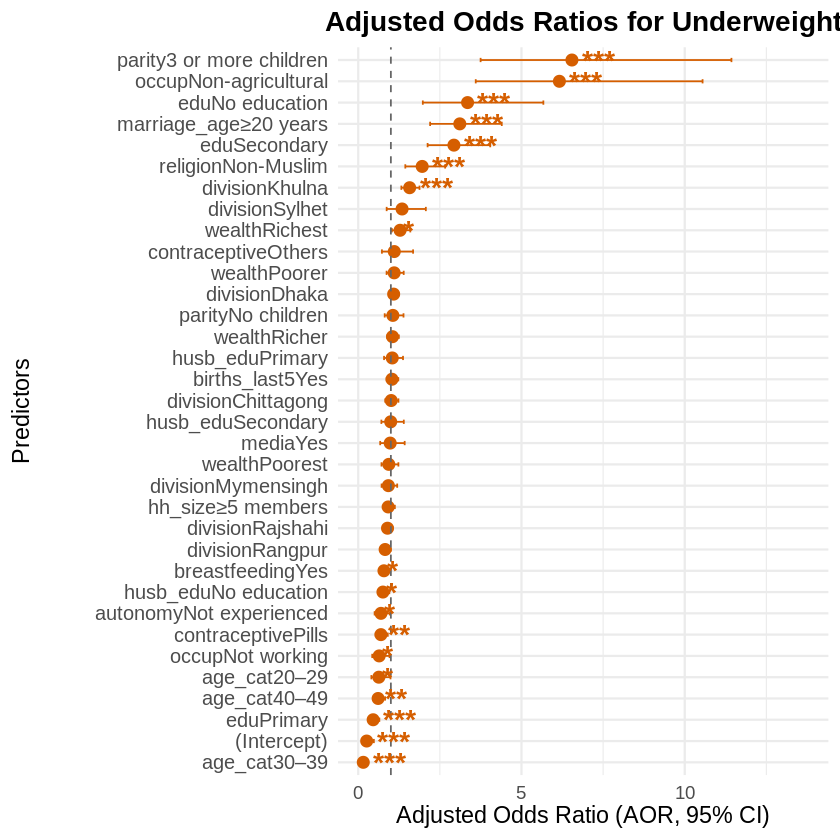

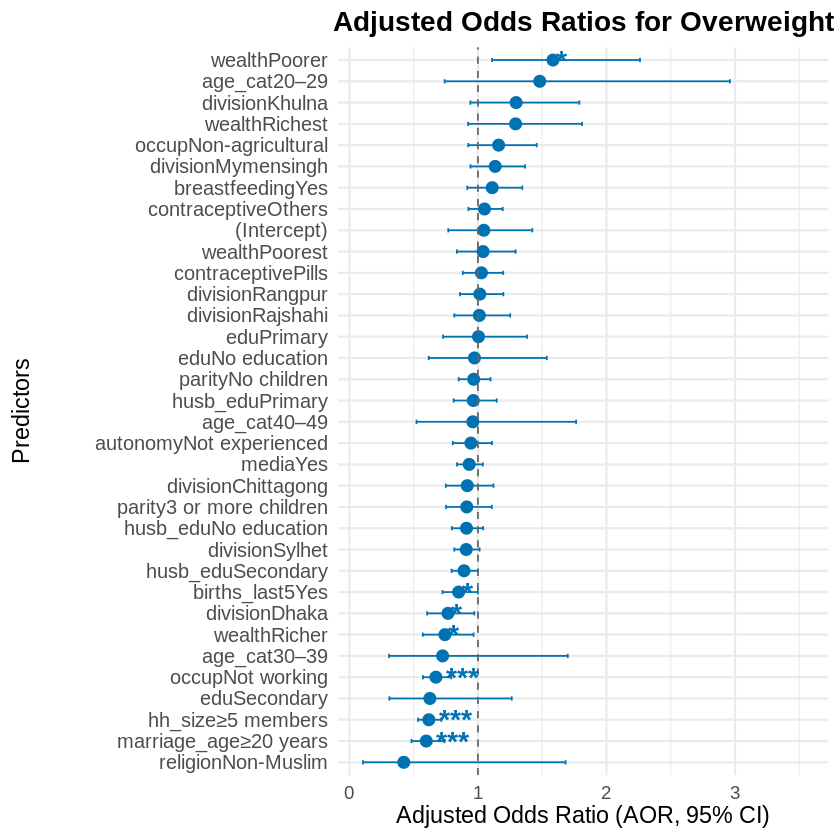

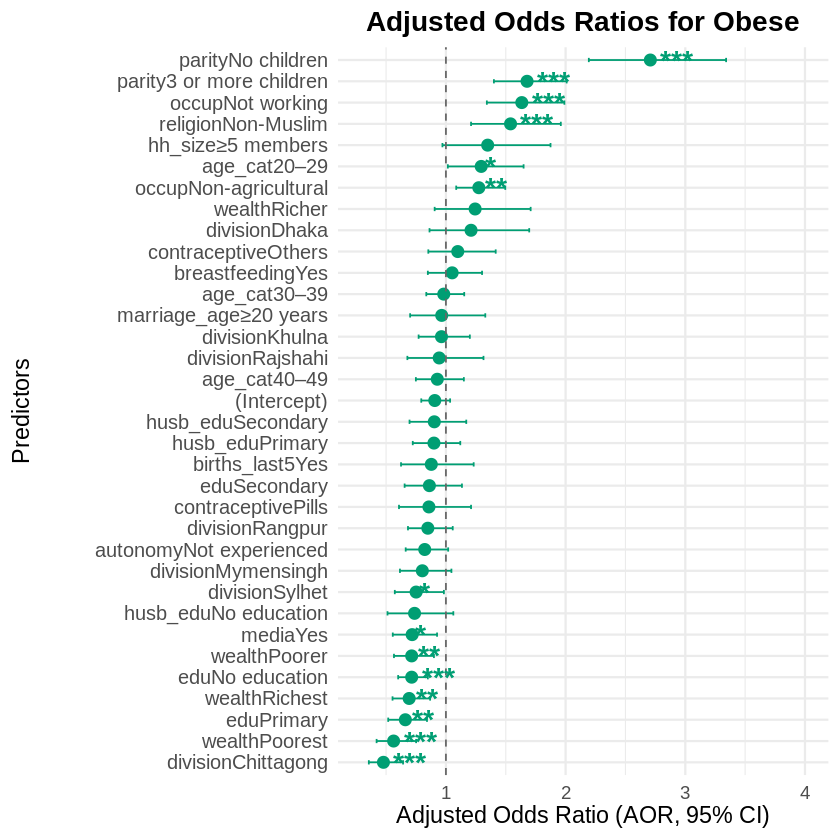

In [ ]:
library(ggplot2)
library(dplyr)
library(forcats)

# Function to add significance stars based on p-value
add_significance <- function(p) {
  if (is.na(p)) return("")
  else if (p < 0.001) return("***")
  else if (p < 0.01) return("**")
  else if (p < 0.05) return("*")
  else return("")
}

plot_forest <- function(df, outcome_name, color="#0072B2") {
  df <- df %>%
    filter(!is.na(AOR)) %>%
    mutate(
      Predictor = fct_reorder(Predictor, AOR),
      signif = sapply(p_value, add_significance)
    )

  ggplot(df, aes(x = AOR, y = Predictor)) +
    geom_point(color = color, size = 3) +
    geom_errorbarh(aes(xmin = lower_95CI, xmax = upper_95CI), height = 0.2, color = color) +
    geom_vline(xintercept = 1, linetype = "dashed", color = "gray40") +
    geom_text(aes(label = signif),
              hjust = -0.3,
              size = 6,
              color = color,
              fontface = "bold") +
    labs(
      title = paste("Adjusted Odds Ratios for", outcome_name),
      x = "Adjusted Odds Ratio (AOR, 95% CI)", y = "Predictors"
    ) +
    theme_minimal(base_size = 14) +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold"),
      axis.text.y = element_text(size = 12)
    ) +
    coord_cartesian(xlim = c(min(df$lower_95CI, na.rm = TRUE) * 0.8,
                             max(df$upper_95CI, na.rm = TRUE) * 1.2))
}

# Example usage with your results_list
p_underweight <- plot_forest(overall_results$underweight, "Underweight", "#D55E00") # reddish
p_overweight  <- plot_forest(overall_results$overweight,  "Overweight", "#0072B2")  # blue
p_obese       <- plot_forest(overall_results$obese,       "Obese",      "#009E73")  # green

print(p_underweight)
print(p_overweight)
print(p_obese)


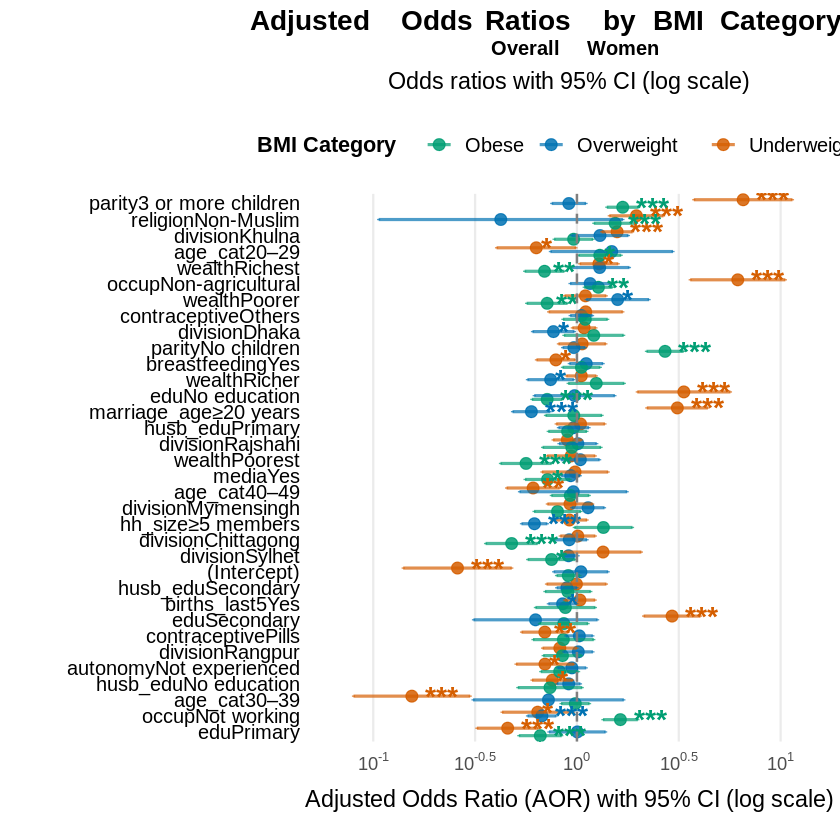

In [ ]:
library(dplyr)
library(ggplot2)
library(forcats)
library(ggtext)   # For markdown in titles

# Add significance stars function
add_significance <- function(p) {
  if (is.na(p)) return("")
  else if (p < 0.001) return("***")
  else if (p < 0.01) return("**")
  else if (p < 0.05) return("*")
  else return("")
}

# Combine all categories into one dataframe
combined_results <- bind_rows(
  overall_results$underweight %>% mutate(Category = "Underweight"),
  overall_results$overweight %>% mutate(Category = "Overweight"),
  overall_results$obese %>% mutate(Category = "Obese")
)

# Filter out any rows with NA AORs (optional)
combined_results <- combined_results %>% filter(!is.na(AOR))

# Create significance stars column
combined_results <- combined_results %>% mutate(signif = sapply(p_value, add_significance))

# Order predictors within each category by AOR (for better visualization)
combined_results <- combined_results %>%
  mutate(Predictor = fct_reorder(Predictor, AOR))

# Define category colors
category_colors <- c(
  "Underweight" = "#D55E00",  # Orange-red
  "Overweight" = "#0072B2",   # Blue
  "Obese" = "#009E73"         # Green
)

# Plot
p <- ggplot(combined_results, aes(x = AOR, y = Predictor, color = Category)) +
  geom_point(position = position_dodge(width = 0.7), size = 3, alpha = 0.85) +  # slightly larger points with some transparency
  geom_errorbarh(aes(xmin = lower_95CI, xmax = upper_95CI),
                 position = position_dodge(width = 0.7), height = 0.25, size = 0.9, alpha = 0.7) +  # thicker error bars with transparency
  geom_text(aes(label = signif),
            position = position_dodge(width = 0.7),
            hjust = -0.4,   # place stars just to the right of points
            size = 6,
            fontface = "bold",
            show.legend = FALSE) +  # no legend for stars
  geom_vline(xintercept = 1, linetype = "dashed", color = "gray50", size = 0.7) +  # vertical line at null effect
  scale_color_manual(values = category_colors) +

  # Log scale for x-axis
  scale_x_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
  ) +

  labs(
    title = "**Adjusted Odds Ratios by BMI Category** <br> <span style='font-size:12pt;'>Overall Women</span>",
    subtitle = "Odds ratios with 95% CI (log scale)",
    x = "Adjusted Odds Ratio (AOR) with 95% CI (log scale)",
    y = NULL,
    color = "BMI Category"
  ) +

  theme_minimal(base_size = 14) +

  theme(
    plot.title = element_markdown(hjust = 0.5, face = "bold"),  # markdown for bold + line break
    plot.subtitle = element_text(hjust = 0.5, margin = margin(b = 15)),
    legend.position = "top",
    legend.title = element_text(face = "bold", size = 13),
    legend.text = element_text(size = 12),
    axis.text.y = element_text(size = 12, color = "black"),
    axis.text.x = element_text(size = 11),
    axis.title.x = element_text(margin = margin(t = 10, b = 10)),
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank()
  ) +

  coord_cartesian(
    xlim = c(
      min(combined_results$lower_95CI, na.rm = TRUE) * 0.8,
      max(combined_results$upper_95CI, na.rm = TRUE) * 1.15
    )
  )

print(p)

# Optionally save the plot as high-res PNG
ggsave("combined_forest_plot_overall_women_professional_with_stars.png", plot = p, width = 11, height = 7, dpi = 600)


In [ ]:
# # Step 0: Filter Rural women only
# df_rural <- df %>% filter(area == "Rural")

# # Convert outcome and predictors to factors in df_rural
# df_rural$bmi <- factor(df_rural$bmi, levels = c("Normal", "Underweight", "Overweight", "Obese"))

# # Remove 'area' from predictors because df_rural$area is constant ("Rural")
# factor_vars <- c('age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity',
#                  'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media',
#                  'husb_edu', 'hh_size', 'wealth', 'division')

# for (v in factor_vars) {
#     df_rural[[v]] <- as.factor(df_rural[[v]])
# }

# # 1. Univariate multinomial logistic regression on Rural subset
# significant_vars_rural <- c()

# for (var in factor_vars) {
#     formula_uni <- as.formula(paste("bmi ~", var))
#     uni_model <- multinom(formula_uni, data = df_rural, trace = FALSE)
#     sum_uni <- summary(uni_model)

#     # Calculate z-values and p-values
#     z_vals <- sum_uni$coefficients / sum_uni$standard.errors
#     p_vals <- 2 * (1 - pnorm(abs(z_vals)))

#     # Check if any p-value for this predictor < 0.25
#     if (any(p_vals < 0.25)) {
#         significant_vars_rural <- c(significant_vars_rural, var)
#         cat(paste("Variable selected:", var, " (min p =", signif(min(p_vals),3), ")\n"))
#     }
# }

# cat("Variables included in final model (Rural only):", significant_vars_rural, "\n")

# # 2. Fit final multinomial logistic regression on Rural subset
# formula_final_rural <- as.formula(paste("bmi ~", paste(significant_vars_rural, collapse = " + ")))
# final_model_rural <- multinom(formula_final_rural, data = df_rural, trace = FALSE)
# summary_final_rural <- summary(final_model_rural)

# # 3. Calculate AOR, 95% CI, and p-values
# coef_mat_rural <- coef(final_model_rural)
# se_mat_rural <- summary_final_rural$standard.errors
# z_vals_rural <- coef_mat_rural / se_mat_rural
# p_vals_rural <- 2 * (1 - pnorm(abs(z_vals_rural)))

# AOR_rural <- exp(coef_mat_rural)
# lower_CI_rural <- exp(coef_mat_rural - 1.96 * se_mat_rural)
# upper_CI_rural <- exp(coef_mat_rural + 1.96 * se_mat_rural)

# # Create results dataframe
# results2 <- data.frame(
#     Outcome = rep(rownames(coef_mat_rural), each = ncol(coef_mat_rural)),
#     Predictor = rep(colnames(coef_mat_rural), times = nrow(coef_mat_rural)),
#     Coef = as.vector(coef_mat_rural),
#     SE = as.vector(se_mat_rural),
#     z = as.vector(z_vals_rural),
#     p_value = as.vector(p_vals_rural),
#     AOR = as.vector(AOR_rural),
#     lower_95CI = as.vector(lower_CI_rural),
#     upper_95CI = as.vector(upper_CI_rural)
# )

# # 4. Filter significant predictors only (p < 0.05)
# results_significant2 <- results2 %>% filter(p_value < 0.05)
# print(results_significant2)

# # 5. Extract significant results for Underweight outcome only
# underweight_summary_rural <- results_significant2 %>% filter(Outcome == "Underweight")
# print(underweight_summary_rural)

# # Optional: Also print all results for Underweight (significant and non-significant)
# underweight_all_rural <- results2 %>% filter(Outcome == "Underweight")
# print(underweight_all_rural)

# # Function to add significance stars
# add_signif_stars <- function(p) {
#     if (is.na(p)) {
#         return("")
#     } else if (p < 0.001) {
#         return("***")
#     } else if (p < 0.01) {
#         return("**")
#     } else if (p < 0.05) {
#         return("*")
#     } else {
#         return("")
#     }
# }

# # Add stars
# underweight_all_rural$signif <- sapply(underweight_all_rural$p_value, add_signif_stars)
# underweight_all_rural$p_value_with_signif <- paste0(
#     round(underweight_all_rural$p_value, 4),
#     underweight_all_rural$signif
# )

# # Print final table
# print(underweight_all_rural[, c("Outcome", "Predictor", "Coef", "AOR", "p_value_with_signif", "lower_95CI", "upper_95CI")])



In [ ]:

library(rcrossref)

doi <- "10.3329/brc.v11i1.78885"
bib_list <- cr_cn(doi, format = "bibentry")

# bib_list is a list; extract the first element which contains the bibtex entry
bib_text <- bib_list[[1]]

# Print the bibtex text
cat(bib_text)



'srcfile' argument is deprecated.



Prevalence And Risk Factors of Malnutrition Among Women of Reproductive Age In Bangladesh: A Secondary Data Analysis of Bdhs 2022

In [ ]:
install.packages("rcrossref")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘triebeard’, ‘lazyeval’, ‘urltools’, ‘httpcode’, ‘crosstalk’, ‘crul’, ‘plyr’, ‘DT’




In [ ]:
install.packages("bibtex")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1]:
# Create folders and subfolders
dir.create("malnutrition-wra-bangladesh")
dir.create("malnutrition-wra-bangladesh/data/raw", recursive = TRUE)
dir.create("malnutrition-wra-bangladesh/data/processed", recursive = TRUE)
dir.create("malnutrition-wra-bangladesh/scripts")
dir.create("malnutrition-wra-bangladesh/notebooks")
dir.create("malnutrition-wra-bangladesh/results/tables", recursive = TRUE)
dir.create("malnutrition-wra-bangladesh/results/figures", recursive = TRUE)
dir.create("malnutrition-wra-bangladesh/report")

# Create placeholder files
file.create("malnutrition-wra-bangladesh/README.md")
file.create("malnutrition-wra-bangladesh/.gitignore")
file.create("malnutrition-wra-bangladesh/requirements.R")
file.create("malnutrition-wra-bangladesh/scripts/data_cleaning.R")
file.create("malnutrition-wra-bangladesh/scripts/descriptive_stats.R")
file.create("malnutrition-wra-bangladesh/scripts/regression_model.R")
file.create("malnutrition-wra-bangladesh/notebooks/01_data_cleaning.Rmd")
file.create("malnutrition-wra-bangladesh/notebooks/02_descriptive_analysis.Rmd")
file.create("malnutrition-wra-bangladesh/notebooks/03_multinomial_logit.Rmd")
file.create("malnutrition-wra-bangladesh/report/final_report.pdf")
file.create("malnutrition-wra-bangladesh/report/presentation.pptx")


[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE